In [1]:
# For data manipulation
import pandas as pd
import numpy as np
import zipfile

# For data visualization
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import plotly.offline as po
import plotly.graph_objs as go

# For models
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
# Pandas display options
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)
pd.set_option('display.max_rows', 500)

# 1. Data Preparation

## 1.1 Read Data

In [9]:
%%time
df_scan = pd.read_csv('train_data.csv')
df_scan.head()

<timed exec>:1: DtypeWarning:

Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.



Wall time: 20.5 s


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,36 months,8.81,317.12,A,A5,NaN,NaN,MORTGAGE,56000.0,Verified,Nov-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,852xx,AZ,20.53,0.0,Apr-2011,1.0,NaN,93.0,7.0,1.0,10494,53.3,19.0,w,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,NaN,Jan-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,301829.0,1.0,3.0,1.0,2.0,11.0,20277.0,59.0,0.0,2.0,5295.0,57.0,19700.0,3.0,1.0,3.0,5.0,43118.0,2323.0,80.6,0.0,0.0,91.0,71.0,19.0,6.0,3.0,19.0,NaN,5.0,NaN,0.0,2.0,3.0,2.0,2.0,10.0,3.0,6.0,3.0,7.0,0.0,0.0,0.0,2.0,100.0,50.0,1.0,0.0,327790.0,30771.0,12000.0,34590.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,10000,10000,10000.0,60 months,27.27,306.97,E,E5,CNC Robotic Welder,10+ years,RENT,70000.0,Source Verified,Nov-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,612xx,IL,11.37,0.0,Nov-2008,1.0,60.0,NaN,4.0,0.0,3193,84.0,24.0,w,0.0,0.0,284.25,284.25,79.72,204.53,0.0,0.0,0.0,Dec-2018,306.97,NaN,Feb-2019,0.0,60.0,1,Individual,NaN,NaN,NaN,0.0,0.0,23289.0,2.0,2.0,3.0,5.0,1.0,20096.0,93.0,0.0,2.0,1568.0,91.0,3800.0,0.0,11.0,2.0,7.0,5822.0,232.0,87.1,0.0,0.0,120.0,89.0,17.0,1.0,0.0,17.0,60.0,3.0,60.0,2.0,1.0,2.0,1.0,3.0,20.0,2.0,4.0,2.0,4.0,0.0,0.0,0.0,3.0,91.7,100.0,0.0,0.0,25493.0,23289.0,1800.0,21693.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4800,4800,4800.0,36 months,16.91,170.92,C,C5,Information Tech II,10+ years,MORTGAGE,111000.0,Source Verified,Nov-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,231xx,VA,13.35,0.0

In [10]:
df_scan.shape

(1827125, 145)

In [73]:
df_scan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827125 entries, 0 to 1827124
Data columns (total 145 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    id                                          float64
 1    member_id                                   float64
 2    loan_amnt                                   int64  
 3    funded_amnt                                 int64  
 4    funded_amnt_inv                             float64
 5    term                                        object 
 6    int_rate                                    float64
 7    installment                                 float64
 8    grade                                       object 
 9    sub_grade                                   object 
 10   emp_title                                   object 
 11   emp_length                                  object 
 12   home_ownership                              object 
 13   annual_inc

## 1.2 Feature Selection

In [74]:
# check the missing rate
miss_rate = pd.DataFrame(df_scan.isnull().mean().round(2).sort_values(ascending=False))
miss_rate.reset_index(inplace=True)
miss_rate.rename(columns={'index':'feature',0:'missing_rate'},inplace=True)
miss_rate

,feature,missing_rate
0,id,1.00
1,member_id,1.00
2,hardship_reason,1.00
3,hardship_status,1.00
4,url,1.00
5,deferral_term,1.00
6,hardship_amount,1.00
7,hardship_start_date,1.00
8,hardship_end_date,1.00
9,payment_plan_start_date,1.00


We notice that a lot of columns having large missing rate. I choose to drop the features which has missing rate over 30%, since it's difficult to impute data accurately with more than 30% missing values.

In [75]:
miss_rate_over30 = miss_rate.loc[miss_rate['missing_rate']>0.3]
drop_feature1 = sorted(list(miss_rate_over30['feature'].values))
df_dropped1 = df_scan.drop(columns=drop_feature1)
print(f'Drop {len(drop_feature1)} features with missing rate over 30%.')
print(f'The shape of the dataframe after dropping: {df_dropped1.shape}')

Drop 58 features with missing rate over 30%.
The shape of the dataframe after dropping: (1827125, 87)


For the remaining features, I checked the description in the Data Dictionary and only keep the features that would have been available to investors considering an investment in the loan. I'm using my best available knowledge to determine which loan features are known to potential investors.

In [76]:
drop_feature2 = ['acc_now_delinq','acc_open_past_24mths','avg_cur_bal',
                 'bc_open_to_buy','bc_util',
                 'chargeoff_within_12_mths','collection_recovery_fee','collections_12_mths_ex_med',
                 'debt_settlement_flag','delinq_2yrs','delinq_amnt',
                 'disbursement_method','funded_amnt','funded_amnt_inv',
                 'hardship_flag','inq_last_6mths','last_credit_pull_d',
                 'last_pymnt_amnt','last_pymnt_d','mo_sin_old_il_acct',
                 'mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl',
                 'mths_since_recent_bc','mths_since_recent_inq','num_accts_ever_120_pd',
                 'num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl',
                 'num_il_tl','num_op_rev_tl','num_rev_accts',
                 'num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m',
                 'num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m',
                 'out_prncp','out_prncp_inv','pct_tl_nvr_dlq',
                 'percent_bc_gt_75','policy_code','pymnt_plan',
                 'recoveries','tax_liens','tot_coll_amt',
                 'tot_cur_bal','tot_hi_cred_lim','total_bal_ex_mort',
                 'total_bc_limit','total_il_high_credit_limit','total_pymnt',
                 'total_pymnt_inv','total_rec_int','total_rec_late_fee',
                 'total_rec_prncp','total_rev_hi_lim','zip_code'] 

In [77]:
df_dropped2 = df_dropped1.drop(columns=drop_feature2)
print(f'Drop {len(drop_feature2)} features which may not available to investors before make investment decisions.')
print(f'I dropped {len(drop_feature1)+len(drop_feature2)} features in total.')
print(f'The shape of the dataframe after dropping: {df_dropped2.shape}')

Drop 60 features which may not available to investors before make investment decisions.
I dropped 118 features in total.
The shape of the dataframe after dropping: (1827125, 27)


In [81]:
selected_feature = list(df_dropped2.columns.values)
print(f'Selected Feature: {selected_feature}')

Selected Feature: ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies']


In [84]:
# according to the previous DTypeWarning in step 1.1, I read data again to avoid the possible loss of data
loan = pd.read_csv('train_data.csv', usecols=selected_feature)
loan

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000,36 months,8.81,317.12,A,A5,NaN,NaN,MORTGAGE,56000.0,Verified,Nov-2018,Charged Off,debt_consolidation,Debt consolidation,AZ,20.53,Apr-2011,7.0,1.0,10494,53.3,19.0,w,Individual,3.0,1.0
1,10000,60 months,27.27,306.97,E,E5,CNC Robotic Welder,10+ years,RENT,70000.0,Source Verified,Nov-2018,Charged Off,debt_consolidation,Debt consolidation,IL,11.37,Nov-2008,4.0,0.0,3193,84.0,24.0,w,Individual,0.0,0.0
2,4800,36 months,16.91,170.92,C,C5,Information Tech II,10+ years,MORTGAGE,111000.0,Source Verified,Nov-2018,Charged Off,debt_consolidation,Debt consolidation,VA,13.35,Jun-2006,12.0,0.0,2809,35.1,19.0,w,Individual,0.0,0.0
3,35000,36 months,14.47,1204.23,C,C2,Engineer,1 year,RENT,95000.0,Source Verified,Nov-2018,Charged Off,home_improvement,Home improvement,TX,11.61,Jun-2005,5.0,0.0,5036,33.8,23.0,w,Individual,4.0,0.0
4,16000,60 months,10.08,340.59,B,B1,warehouse,< 1 year,RENT,45000.0,Not Verified,Nov-2018,Charged Off,debt_consolidation,Debt consolidation,MN,25.52,Feb-2013,10.0,0.0,10784,19.5,14.0,f,Individual,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827120,30000,60 months,30.75,984.47,F,F5,Sales,6 years,MORTGAGE,100000.0,Verified,Oct-2017,Current,debt_consolidation,Debt consolidation,FL,22.13,Aug-1996,9.0,0.0,19206,66.9,14.0,f,Individual,2.0,0.0
1827121,12000,60 months,14.08,279.72,C,C3,house keeper,10+ years,MORTGAGE,58000.0,Not Verified,Oct-2017,Current,debt_consolidation,Debt consolidation,VT,20.88,Jan-2004,12.0,0.0,9592,39.2,34.0,w,Individual,2.0,0.0
1827122,10000,36 months,11.99,332.10,B,B5,Teacher,10+ years,OWN,64000.0,Source Verified,Oct-2017,Current,debt_consolidation,Debt consolidation,IL,12.96,Feb-1995,6.0,0.0,7094,70.9,13.0,w,Individual,3.0,0.0
1827123,12000,60 months,21.45,327.69,D,D5,NaN,NaN,RENT,60000.0,Not Verified,Oct-2017,Current,debt_consolidation,Debt consolidation,AK,30.82,Jul-2003,8.0,0.0,12927,34.9,17.0,w,Individual,0.0,0.0


## 1.3 Set Target Column

In [85]:
loan.loan_status.value_counts()

Fully Paid     865468
Current        828131
Charged Off    133526
Name: loan_status, dtype: int64

Create a new column 'charged_off' to label the target column, and set Charged Off as 1 and Fully Paid/Current as 0.

In [86]:
loan['charged_off'] = loan.loan_status.map({'Fully Paid':0, 'Current':0, 'Charged Off':1})
loan['charged_off'].value_counts()

0    1693599
1     133526
Name: charged_off, dtype: int64

In [88]:
loan.drop(columns=['loan_status'],inplace=True)

## 1.4 Check and Remove Duplicates

In [89]:
print('Shape before drop duplicates:', loan.shape)
loan.drop_duplicates(inplace=True)
print('Shape after drop duplicates:', loan.shape)

Shape before drop duplicates: (1827125, 27)
Shape after drop duplicates: (1827125, 27)


# 2. Exploratory Data Analysis

## 2.1 Pre-Work

In [90]:
def cfratio(data,feature):
    '''
    This function is to calculate the ratio of charged off.
    Input:
    data: dataframe
    feature: a column in data
    Output:
    percent: charged_off/(charged_off + (fully_paid+current))
    '''
    percent = data.groupby(feature)['charged_off'].mean()
    return percent

In [91]:
def group(var, bins):
    '''
    This function is to group continuous variables by quantiles.
    Input:
    var: the continuous variable need be group
    bins: the number of group
    Output:
    An array-like object representing the respective bin for each value of var
    '''
    group = pd.qcut(loan[var],bins)
    return group

In [94]:
# color & palette
gwu = ['#AA9868','#033C5A']

In [95]:
#Create a new empty list to store the variables that we no longer need.
dropl = []

In [96]:
# grab the year which the loan was funded from 'issue_d'
loan['issue_y'] = pd.DatetimeIndex(loan['issue_d']).year.astype('Int64')
dropl.append('issue_d')

## 2.2 EDA

### 2.2.1 Target Label

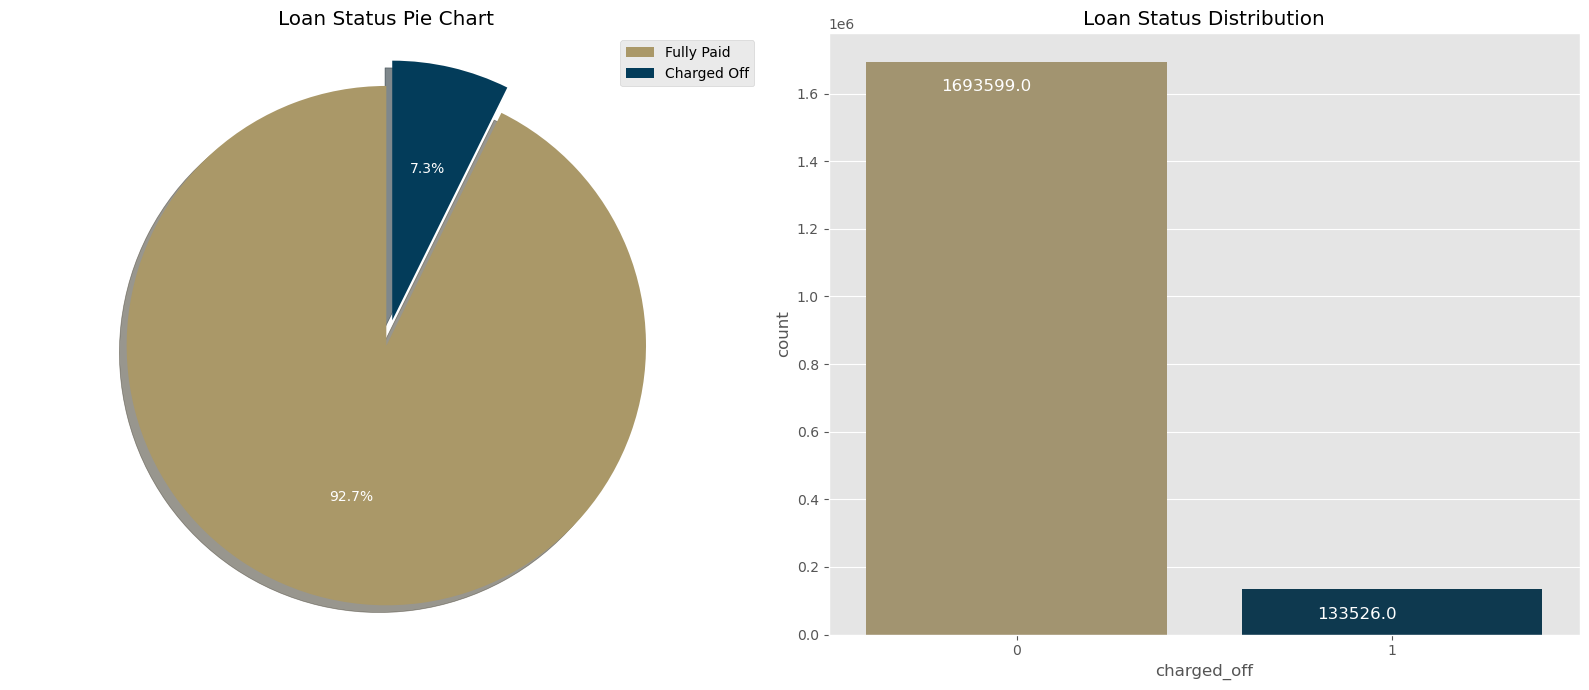

In [99]:
# show the target value distribution
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.pie(
    loan['charged_off'].value_counts(), labels=['Fully Paid', 'Charged Off'],
    autopct='%1.1f%%', startangle=90, explode=(0,0.1), shadow=True,
    colors=['#AA9868','#033C5A'], textprops={'color':"w"}
    )
plt.legend(['Fully Paid', 'Charged Off'])
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title('Loan Status Pie Chart')
plt.subplot(1,2,2)
ax = sns.countplot(x='charged_off',data=loan, palette=['#AA9868','#033C5A'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',(p.get_x()+0.2, p.get_height()), ha='left',va='top',color='w',size=12)
plt.title('Loan Status Distribution')
plt.tight_layout()

Approximately 1,693,599 loans have been fully paid, accounting for 92.7% of the completed loans. The number of default loans is about 133,526, accounting for 7.3%. The data is unbalanced.

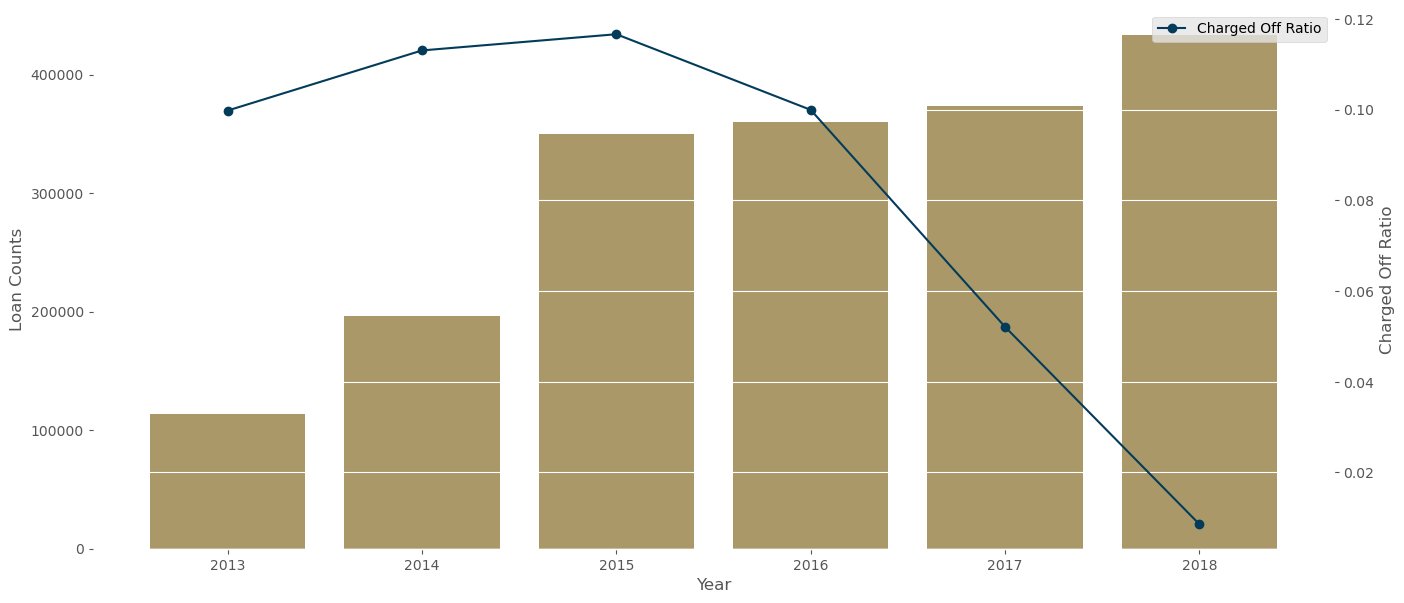

In [100]:
# show the loan counts and charged off ratio by year
ax1_df = loan.groupby('issue_y')['charged_off'].count().reset_index()
ax2_df = cfratio(loan,'issue_y').reset_index()
#plot
fig,ax = plt.subplots(figsize=[16,7])
ax.bar(ax1_df['issue_y'],ax1_df['charged_off'], color='#AA9868')
ax.set_xlabel('Year')
ax.set_ylabel('Loan Counts')
ax.set(facecolor = "white")
ax2 = ax.twinx()
ax2.plot(ax2_df['issue_y'], ax2_df['charged_off'], label='Charged Off Ratio',color='#033C5A', marker='o')
ax2.set_ylabel('Charged Off Ratio')
ax2.legend()
plt.show()

Number of loans continuously increase from 2013 to 2018, and the charged off ratio reached its highest in 2015, then droped sharply.

### 2.2.2 Features

C:\Users\46241\AppData\Local\Temp\ipykernel_19356\2051922467.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Correlation between Loan Status and Numeric Features')

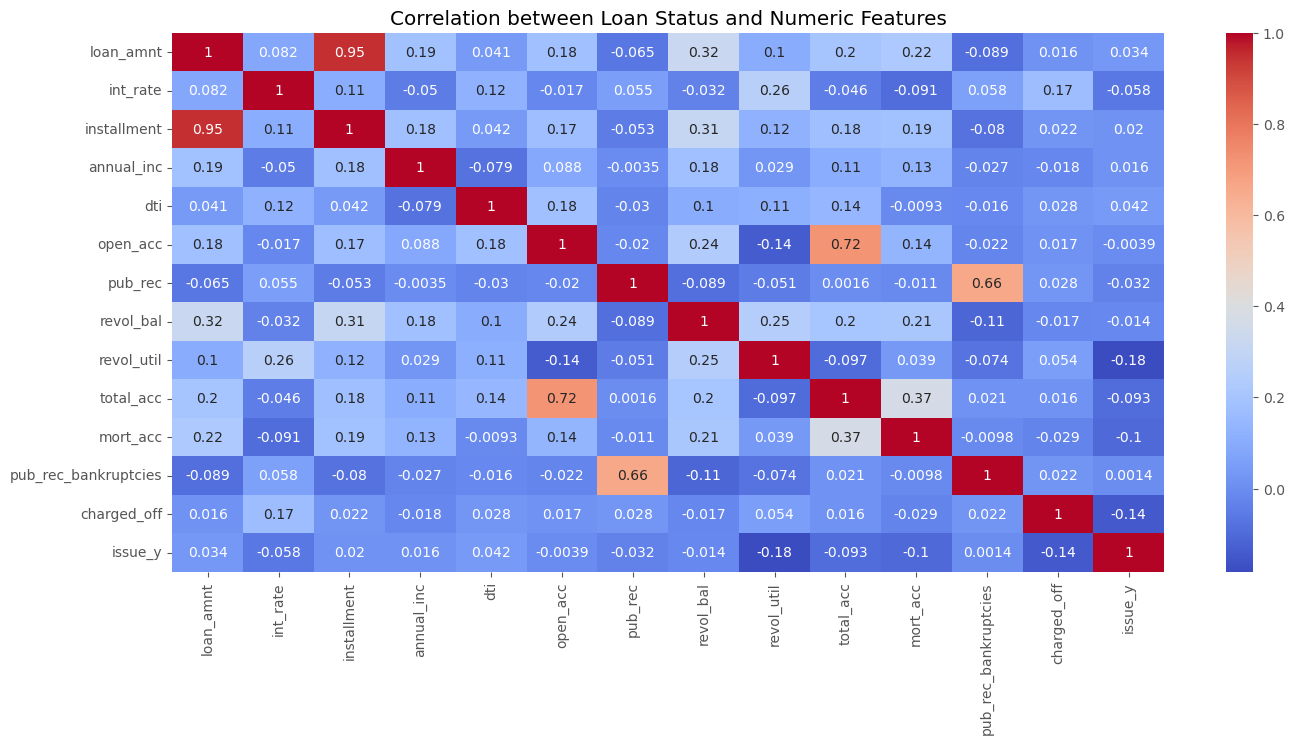

In [102]:
# show the correlation between loan status and numeric features
plt.figure(figsize=(16,7))
sns.heatmap(loan.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Loan Status and Numeric Features')

There are three pairs of variables highly correlated: loan_amnt and installment, open_acc and total_acc, pub_rec and pub_rec_bankruptcies. I need to drop one of each pair to avoid collinearity.

Text(0.5, 1.0, 'Installment Distribution by Loan Status')

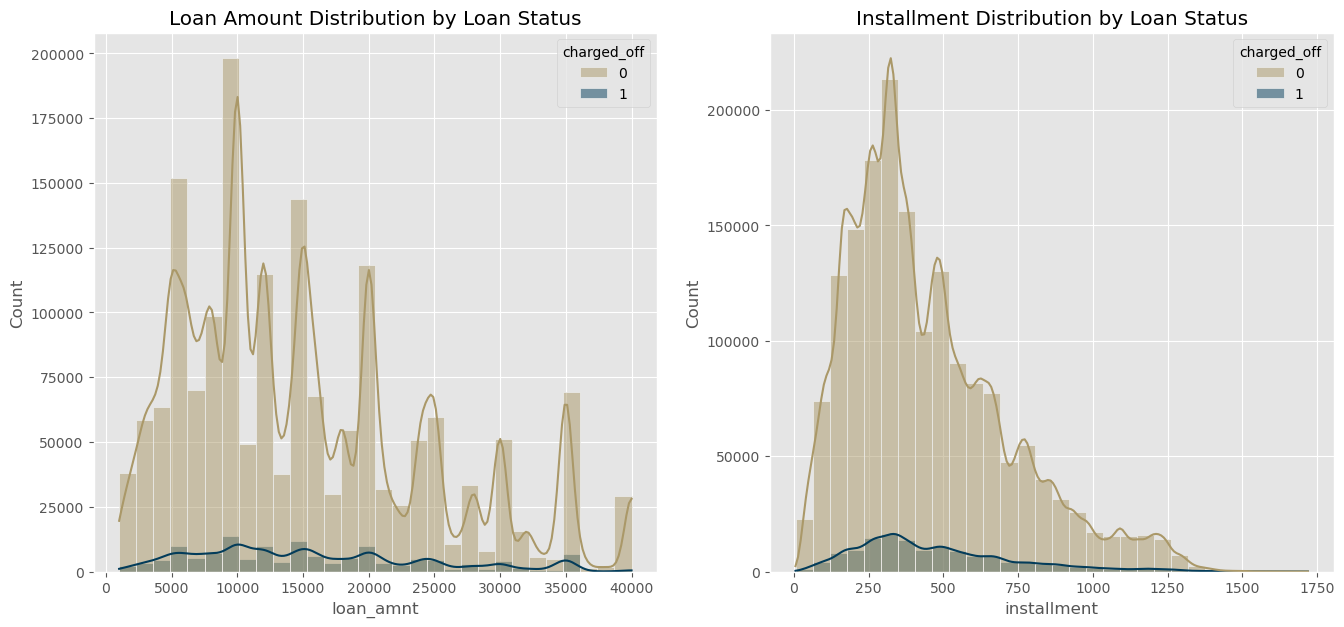

In [105]:
# loan_amount vs installment
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.histplot(data=loan, x='loan_amnt', hue='charged_off',bins=30, kde=True, palette=gwu)
plt.title('Loan Amount Distribution by Loan Status')
plt.subplot(1,2,2)
sns.histplot(data=loan, x='installment', hue='charged_off',bins=30, kde=True, palette=gwu)
plt.title('Installment Distribution by Loan Status')

'loan_amnt' and 'installment' are highly correlated, and the correlation coefficient is 0.95. It's realistic that as loan amount increase, the installment will increase as well. And as 'loan_amnt' has a higher correlation coefficient with 'charged_off'. So, I will drop 'installment'.

In [109]:
dropl.append('installment')

Text(0.5, 1.0, 'Total Accounts Distribution by Loan Status')

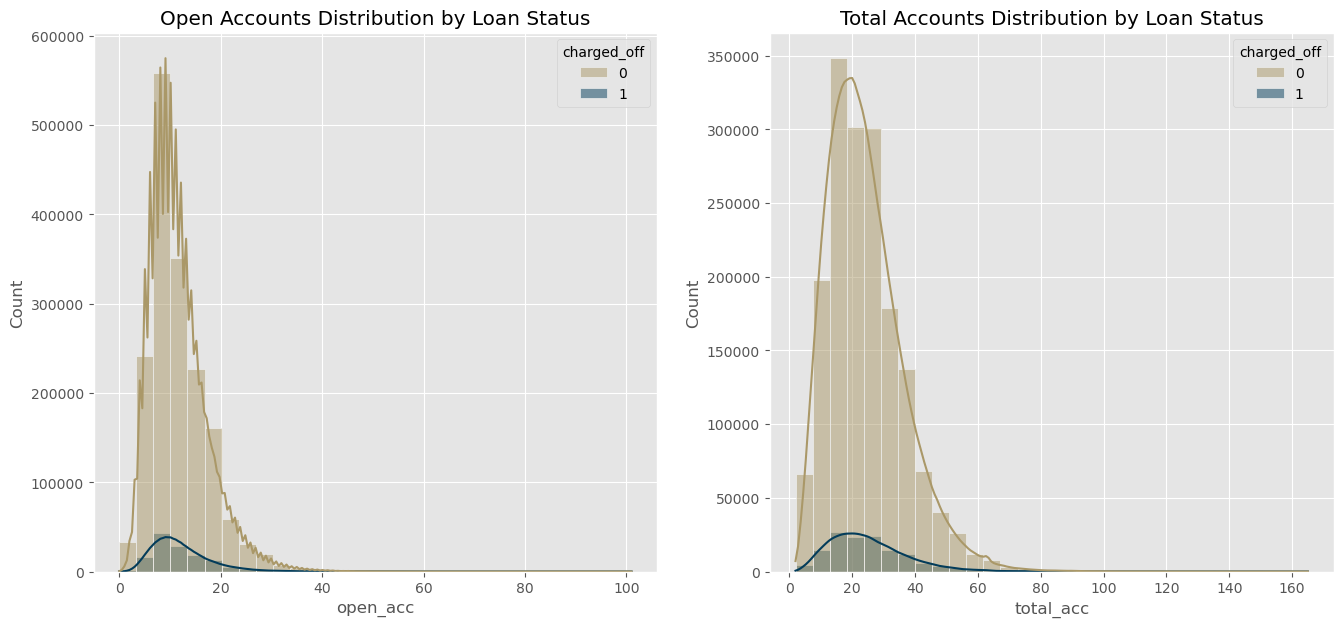

In [113]:
# open_acc vs total_acc
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.histplot(data=loan, x='open_acc', hue='charged_off',bins=30, kde=True, palette=gwu)
plt.title('Open Accounts Distribution by Loan Status')
plt.subplot(1,2,2)
sns.histplot(data=loan, x='total_acc', hue='charged_off',bins=30, kde=True, palette=gwu)
plt.title('Total Accounts Distribution by Loan Status')

It seems there are no significant difference between open_acc and total_acc, so I will drop one of them.

In [131]:
dropl.append('total_acc')

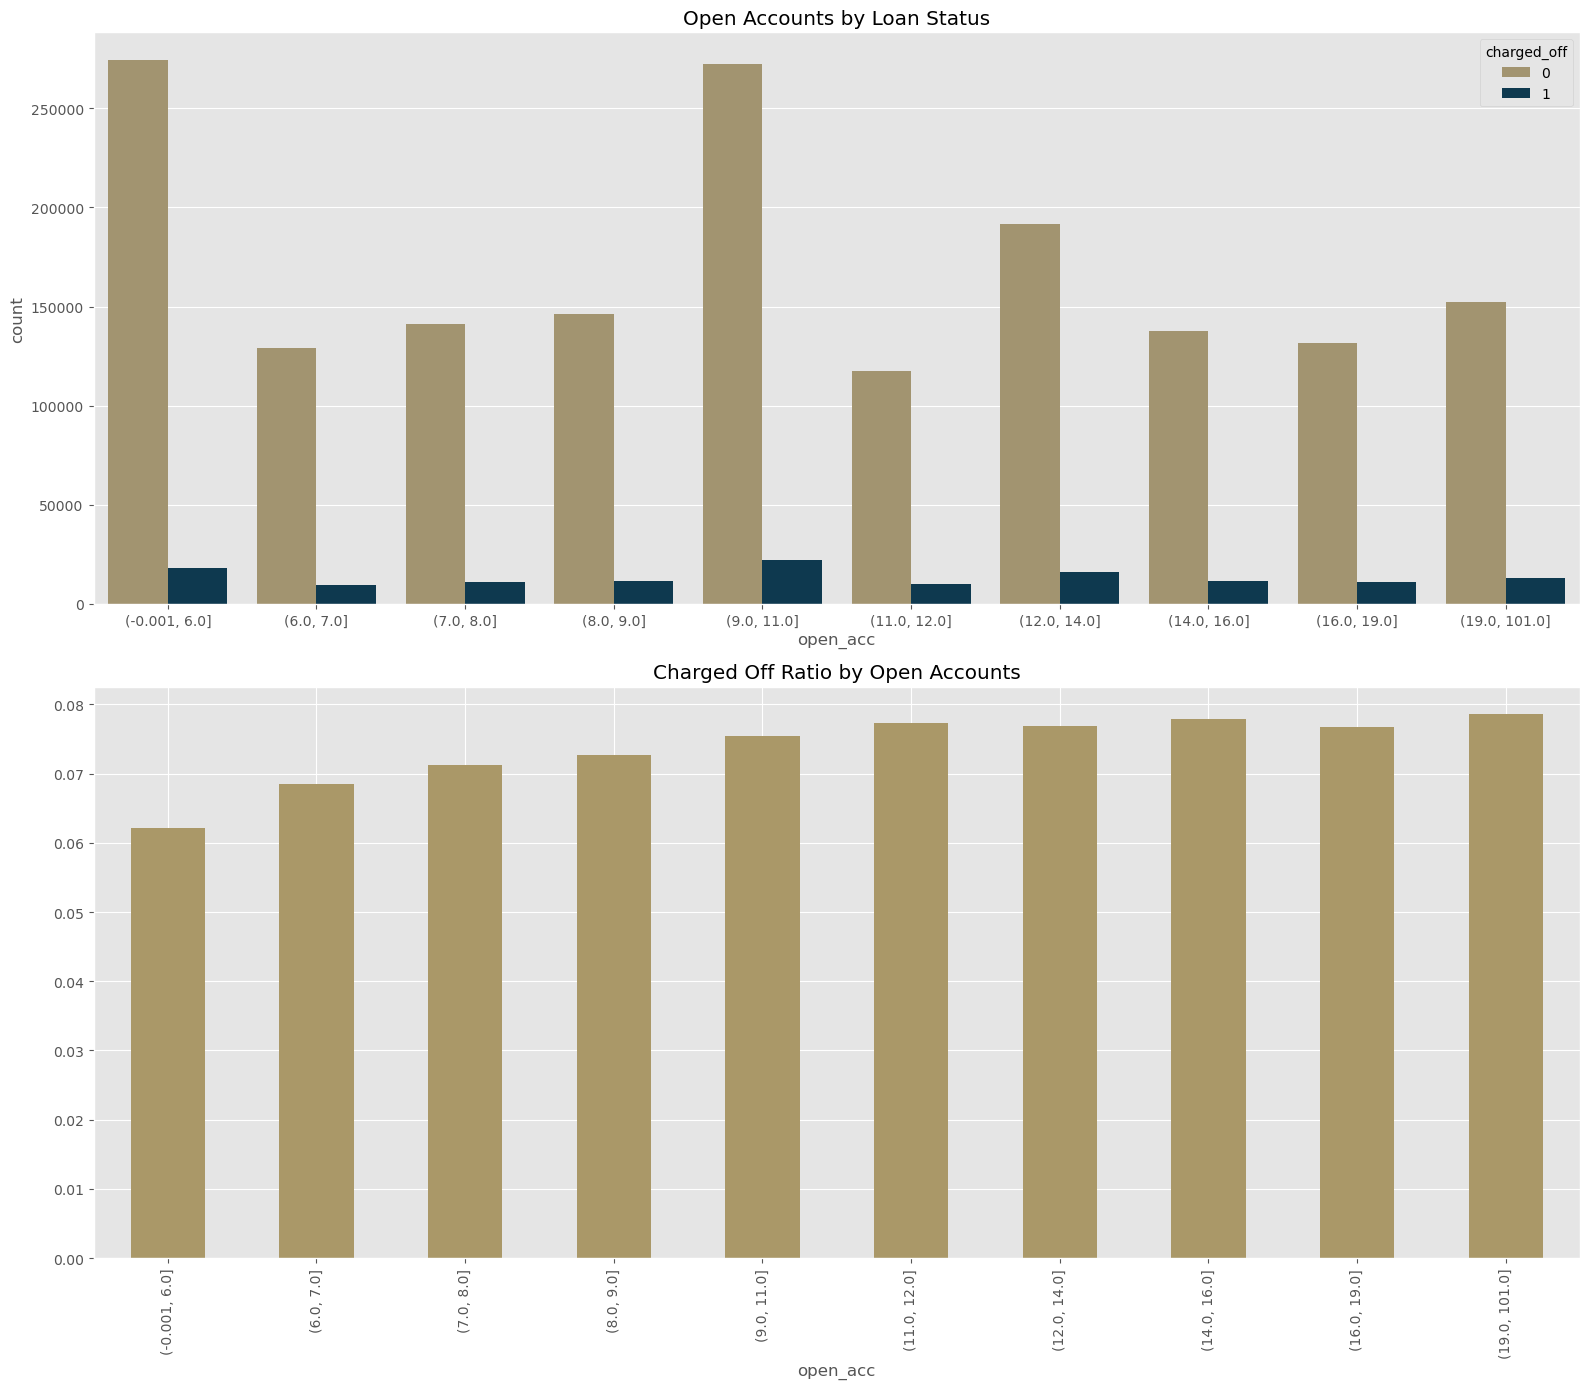

In [121]:
plt.figure(figsize=(16,14))
plt.subplot(2,1,1)
sns.countplot(data=loan, x=group('open_acc',10), hue='charged_off', palette=gwu)
plt.title('Open Accounts by Loan Status')
plt.subplot(2,1,2)
cfratio(loan,group('open_acc',10)).plot(kind='bar', color='#AA9868')
plt.title('Charged Off Ratio by Open Accounts')
plt.tight_layout()

‘open_acc’ has little effect on the charged off ratio, but it can be seen that as the number of total accounts increases, the default rate rises slightly.

Text(0.5, 1.0, 'Public Bankrupticies Record Distribution by Loan Status')

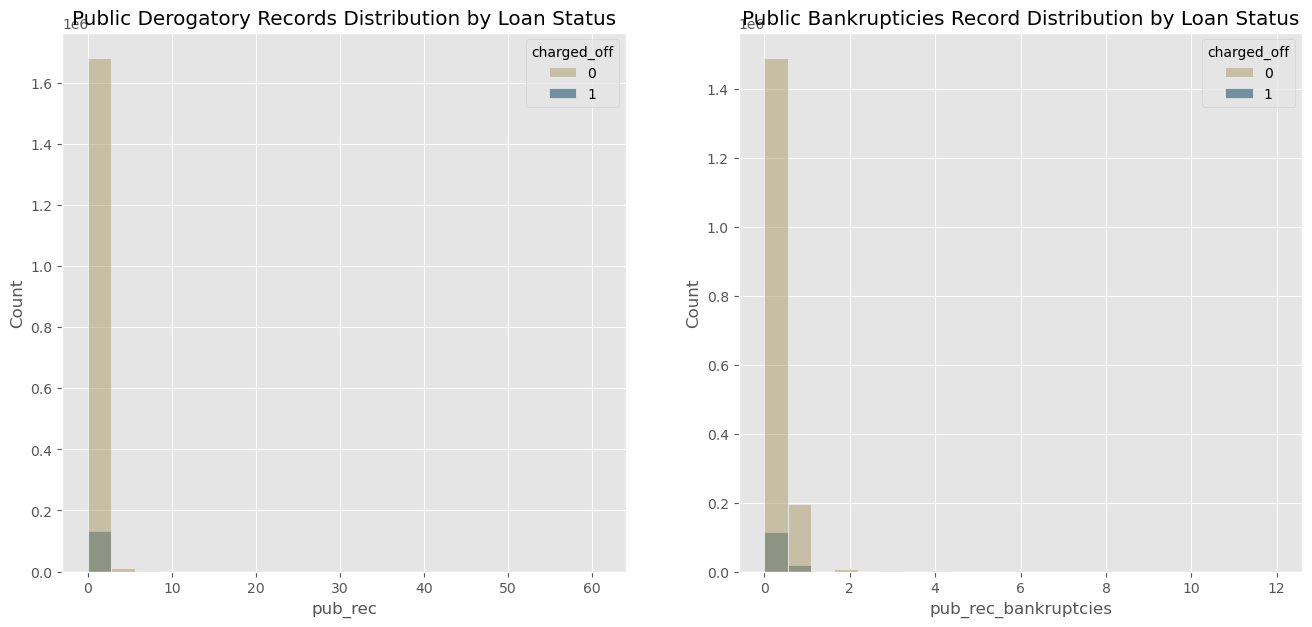

In [124]:
# pub_rec vs pub_rec_bankruptcies
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.histplot(data=loan, x='pub_rec', hue='charged_off', palette=gwu)
plt.title('Public Derogatory Records Distribution by Loan Status')
plt.subplot(1,2,2)
sns.histplot(data=loan, x='pub_rec_bankruptcies', hue='charged_off', palette=gwu)
plt.title('Public Bankrupticies Record Distribution by Loan Status')

It seems there are no significant difference between pub_rec and pub_rec_bankruptcies, so I will drop one of them.

In [132]:
dropl.append('pub_rec_bankruptcies')

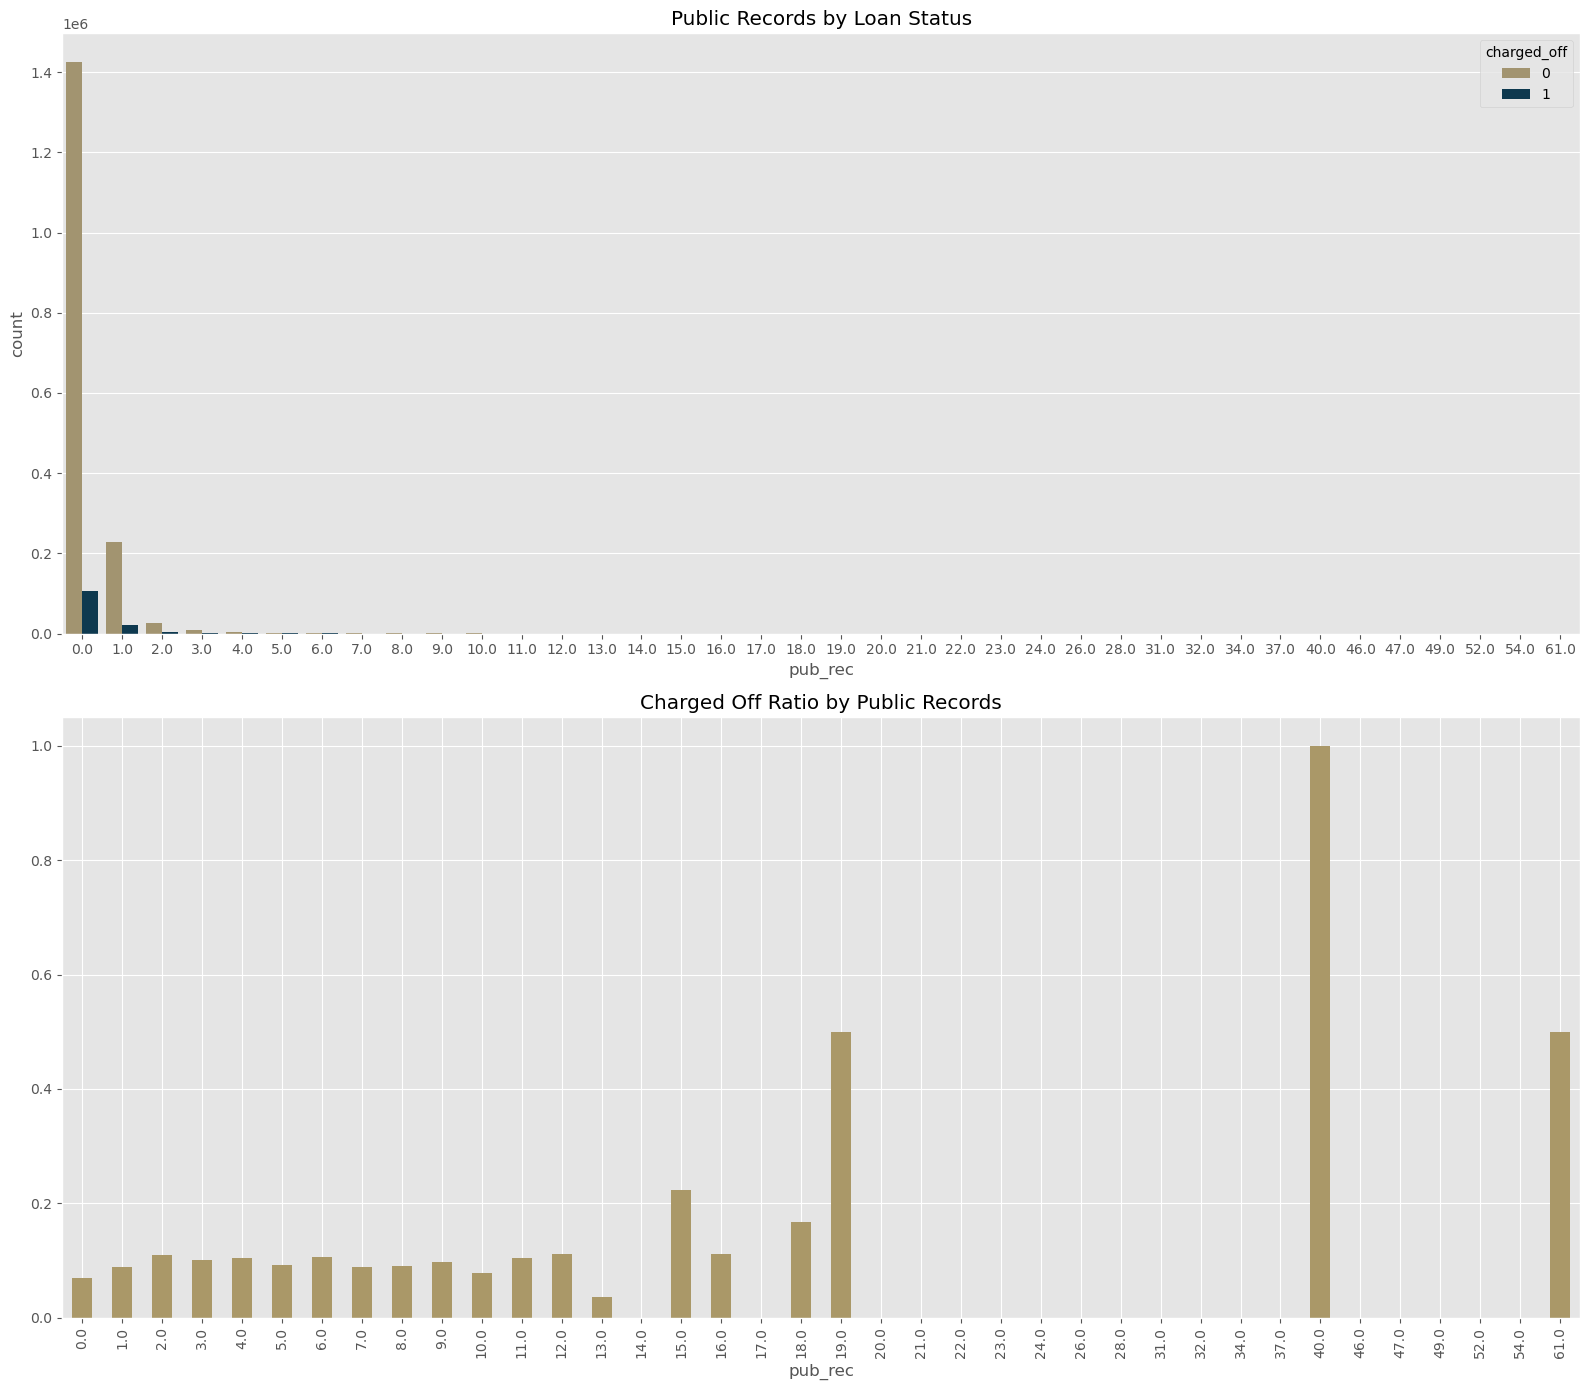

In [134]:
plt.figure(figsize=(16,14))
plt.subplot(2,1,1)
sns.countplot(data=loan, x='pub_rec', hue='charged_off', palette=gwu)
plt.title('Public Records by Loan Status')
plt.subplot(2,1,2)
cfratio(loan,'pub_rec').plot(kind='bar', color='#AA9868')
plt.title('Charged Off Ratio by Public Records')
plt.tight_layout()

People who have more derogatory public records will have higher charged off rate.

There also have some similar features, like 'grade' and 'sub_grade', 'emp_title' and 'emp_length', 'purpose' and 'title'. I'll check if I need to drop one of each pair.

In [137]:
# grade and sub_grade
print("'grade' unique values: ", sorted(loan['grade'].unique()))
print("'sub_grade' unique values: ", sorted(loan['sub_grade'].unique()))

'grade' unique values:  ['A', 'B', 'C', 'D', 'E', 'F', 'G']
'sub_grade' unique values:  ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


The grade is implied by the subgrade. So, I will drop grade.

In [140]:
dropl.append('grade')

Text(0.5, 1.0, 'Charged Off Ratio by Sub Grade')

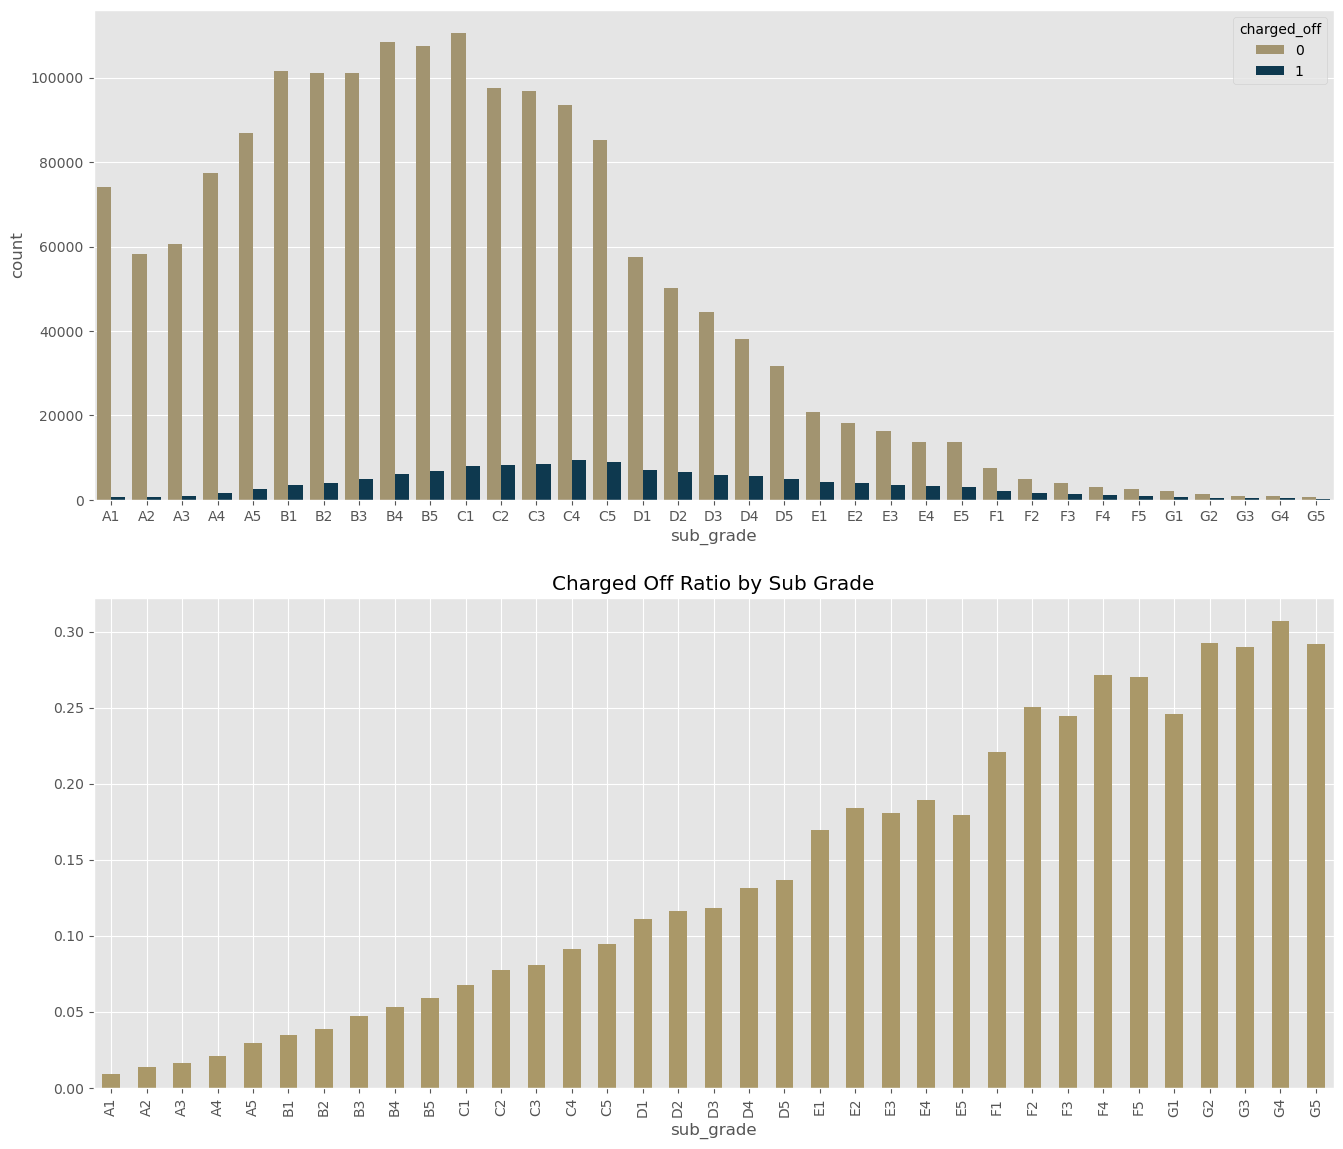

In [136]:
plt.figure(figsize=(16,14))
plt.subplot(2,1,1)
sub_grade = sorted(loan['sub_grade'].unique().tolist())
sns.countplot(x='sub_grade', data=loan, hue='charged_off', order=sub_grade, palette=gwu)
plt.subplot(2,1,2)
cfratio(loan,'sub_grade').plot(kind='bar',color='#AA9868')
plt.title('Charged Off Ratio by Sub Grade')

As the sub grade getting worse, the number of charged off loans is catch up with the number of fully paid, meanwhile the charged off rate is getting larger.

In [139]:
# emp_title and emp_length
print('There are {} unique job titles.'.format(loan['emp_title'].nunique()))

There are 401005 unique job titles.


There are too many unique values in 'emp_title' value, it will be difficult to convert this to a dummy variable feature. So, I will drop this variable.

In [141]:
dropl.append('emp_title')

Text(0.5, 1.0, 'The most 20 jobs title afforded a loan')

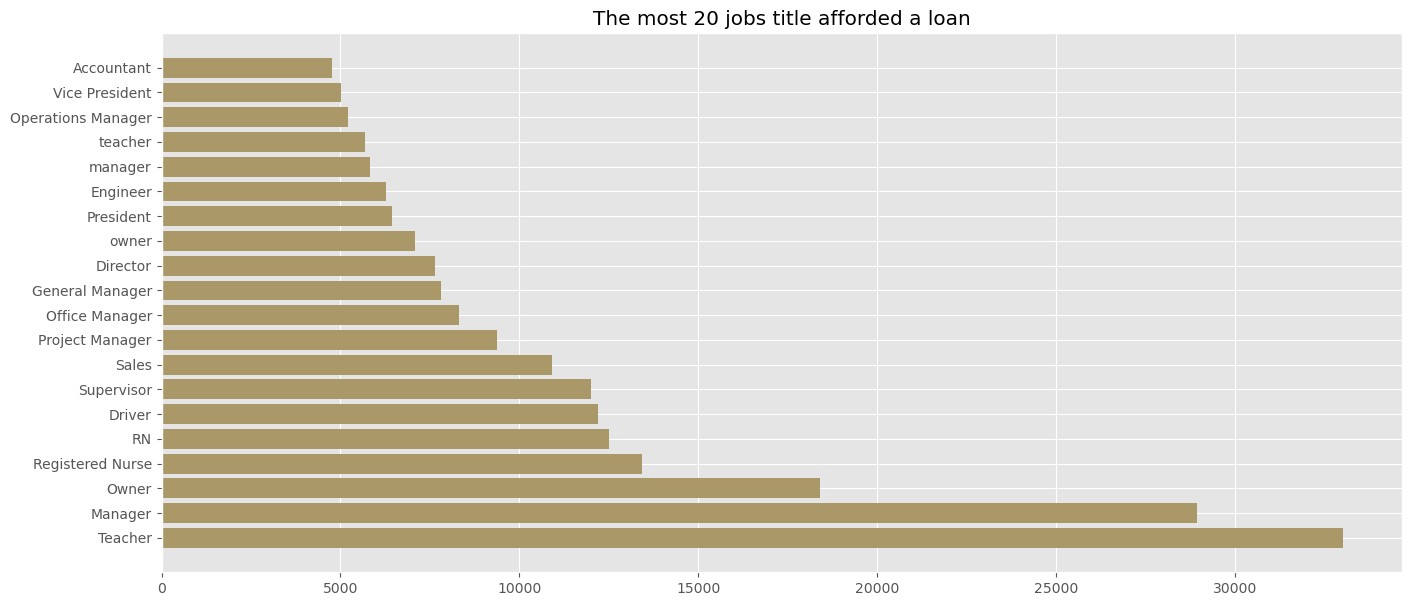

In [143]:
plt.figure(figsize=(16,7))
plt.barh(loan['emp_title'].value_counts()[:20].index, loan['emp_title'].value_counts()[:20], color='#AA9868')
plt.title("The most 20 jobs title afforded a loan")

In [145]:
loan['emp_length'].unique()

array([nan, '10+ years', '1 year', '< 1 year', '4 years', '6 years',
       '3 years', '2 years', '7 years', '8 years', '5 years', '9 years'],
      dtype=object)

Text(0.5, 1.0, 'Charged Off Ratio by Employee Length')

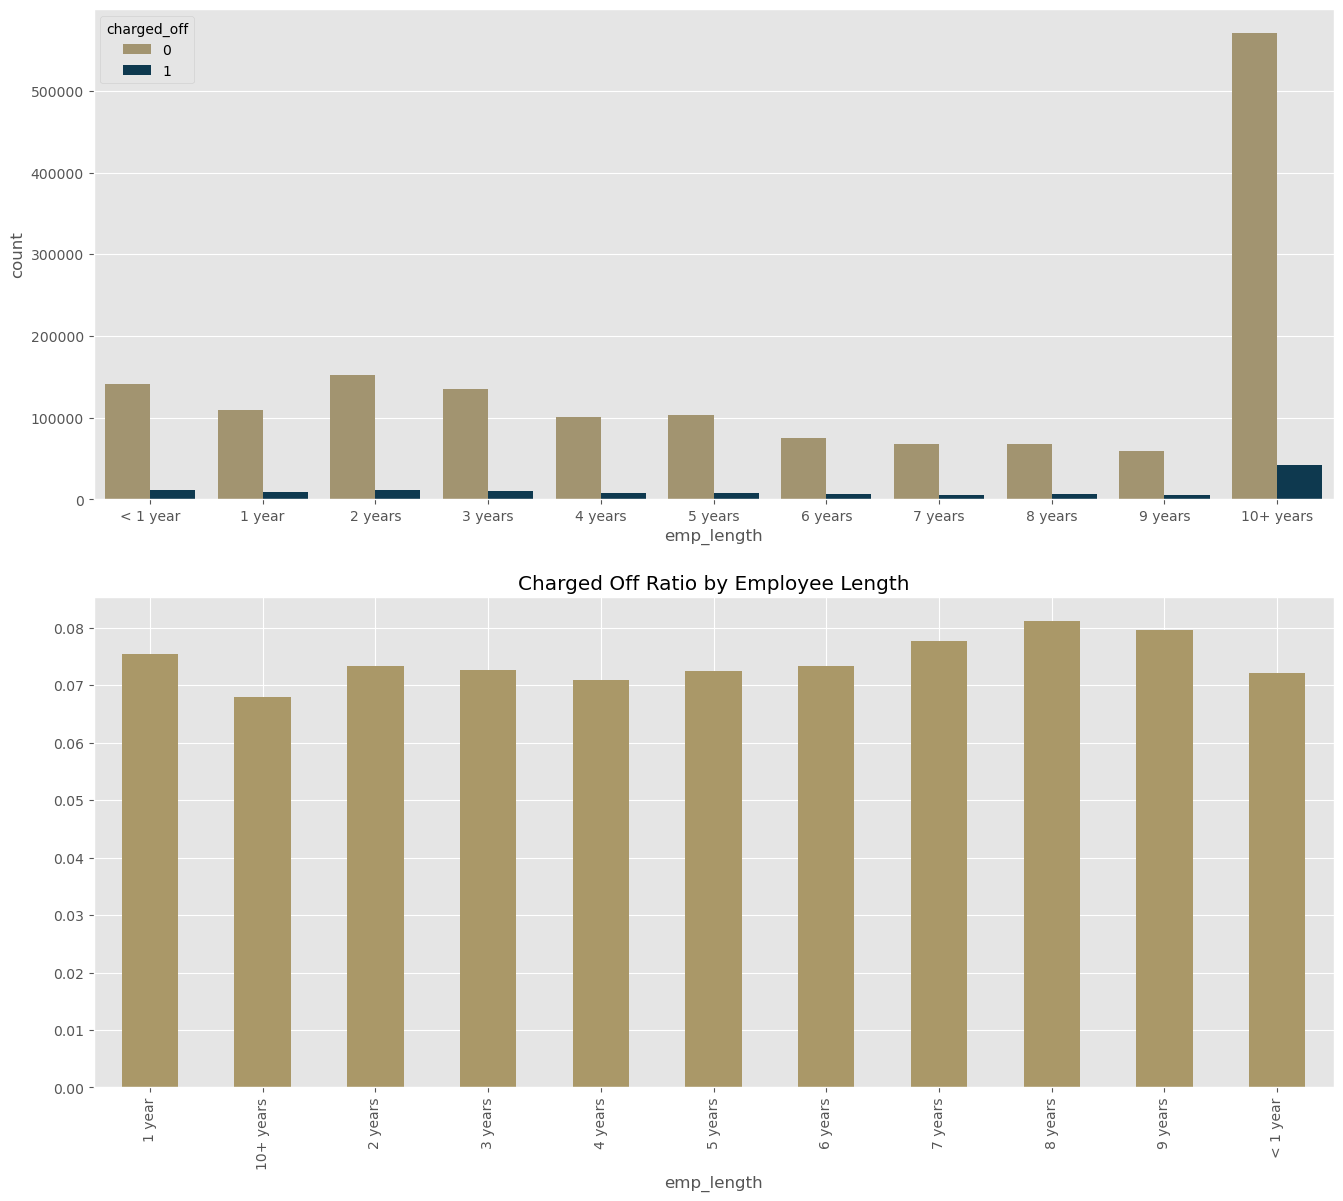

In [147]:
plt.figure(figsize=(16,14))
plt.subplot(2,1,1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
sns.countplot(x='emp_length', data=loan, hue='charged_off', order=order, palette=gwu)
plt.subplot(2,1,2)
cfratio(loan,'emp_length').plot(kind='bar', color='#AA9868')
plt.title('Charged Off Ratio by Employee Length')

There is no significant change in loan status. So I will drop it.

In [149]:
dropl.append('emp_length')

In [151]:
# purpose and title
loan['purpose'].value_counts()

debt_consolidation    1030993
credit_card            427846
home_improvement       122650
other                  111160
major_purchase          39471
medical                 21874
car                     18458
small_business          17414
vacation                12536
moving                  11953
house                   11166
renewable_energy         1074
wedding                   528
educational                 2
Name: purpose, dtype: int64

The data here maybe incomplete, since there are only two educational loan.

In [152]:
loan['title'].value_counts()

Debt consolidation                   965190
Credit card refinancing              400122
Home improvement                     116412
Other                                107130
Major purchase                        37655
                                      ...  
Debt releif                               1
payoff cards                              1
Good Cause                                1
Clean up credit cards                     1
Paying off the car and some bills         1
Name: title, Length: 29126, dtype: int64

In [153]:
loan['title'].value_counts().head(15)

Debt consolidation           965190
Credit card refinancing      400122
Home improvement             116412
Other                        107130
Major purchase                37655
Medical expenses              21190
Car financing                 17540
Business                      16669
Vacation                      12120
Moving and relocation         11437
Home buying                   10652
Debt Consolidation             7959
Consolidation                  3121
debt consolidation             2544
Credit Card Consolidation      1267
Name: title, dtype: int64

There are almost 30,000 different titles. Based on the top 15 titles, it seems the purpose variable already contains information of title variable. So I will drop the title variable.

In [154]:
dropl.append('title')

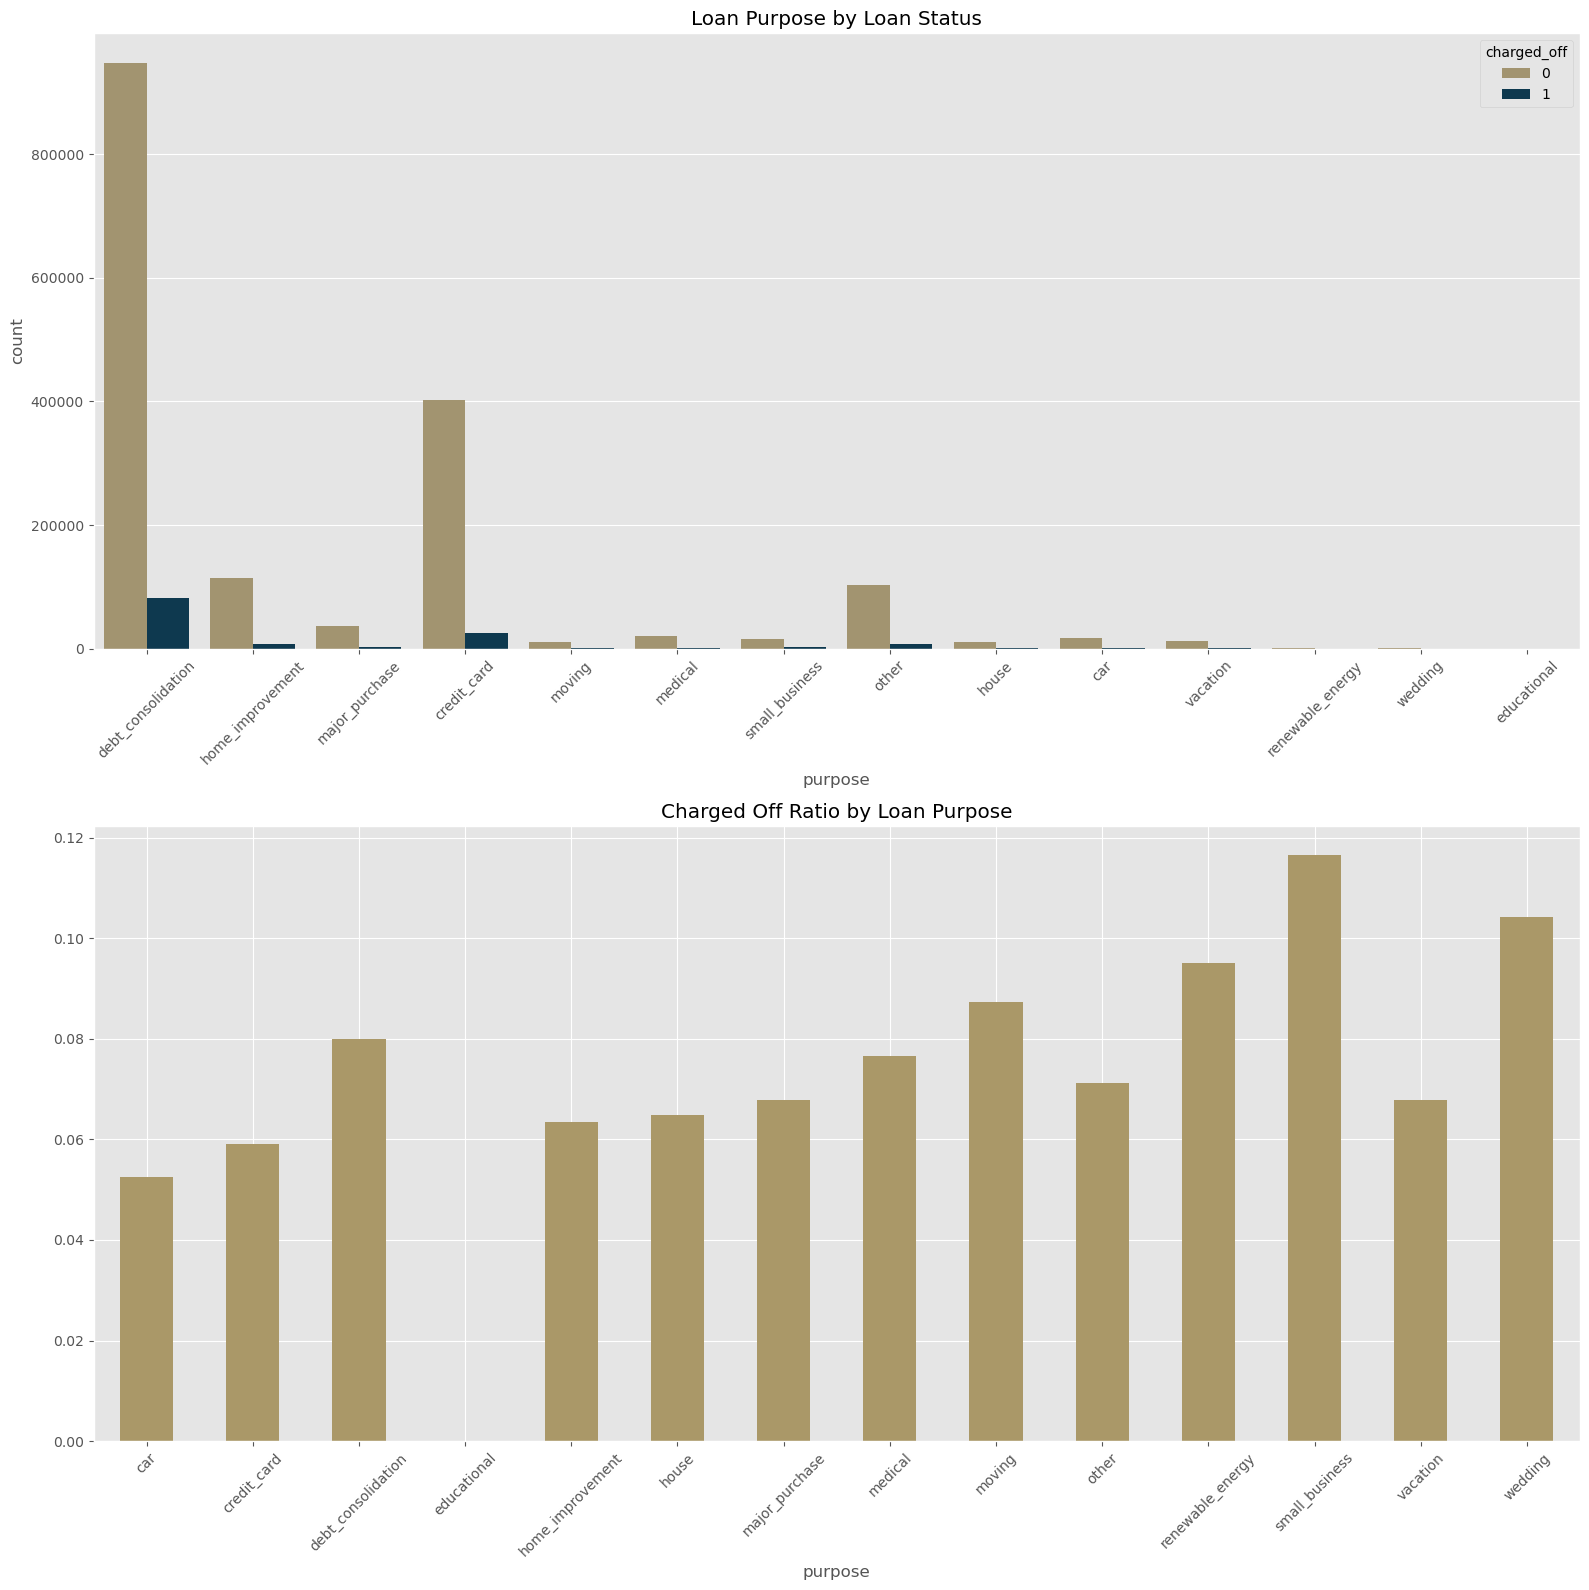

In [156]:
plt.figure(figsize=(16,16))
plt.subplot(2,1,1)
sns.countplot(x='purpose', data=loan, hue='charged_off', palette=gwu)
plt.xticks(rotation=45)
plt.title('Loan Purpose by Loan Status')
plt.subplot(2,1,2)
cfratio(loan,'purpose').plot(kind='bar',color='#AA9868')
plt.xticks(rotation=45)
plt.title('Charged Off Ratio by Loan Purpose')
plt.tight_layout()

Loans for debt consolidation have the highest counts, also the highest counts of fully paid and charged off. But the highest charged off percent belongs to loans for small business. And loans for education have the smallest charged off percent, which seems not correct.

The following content shows the basic information of other features.

Text(0.5, 1.0, 'Charged Off Ratio by Mortgage Accounts')

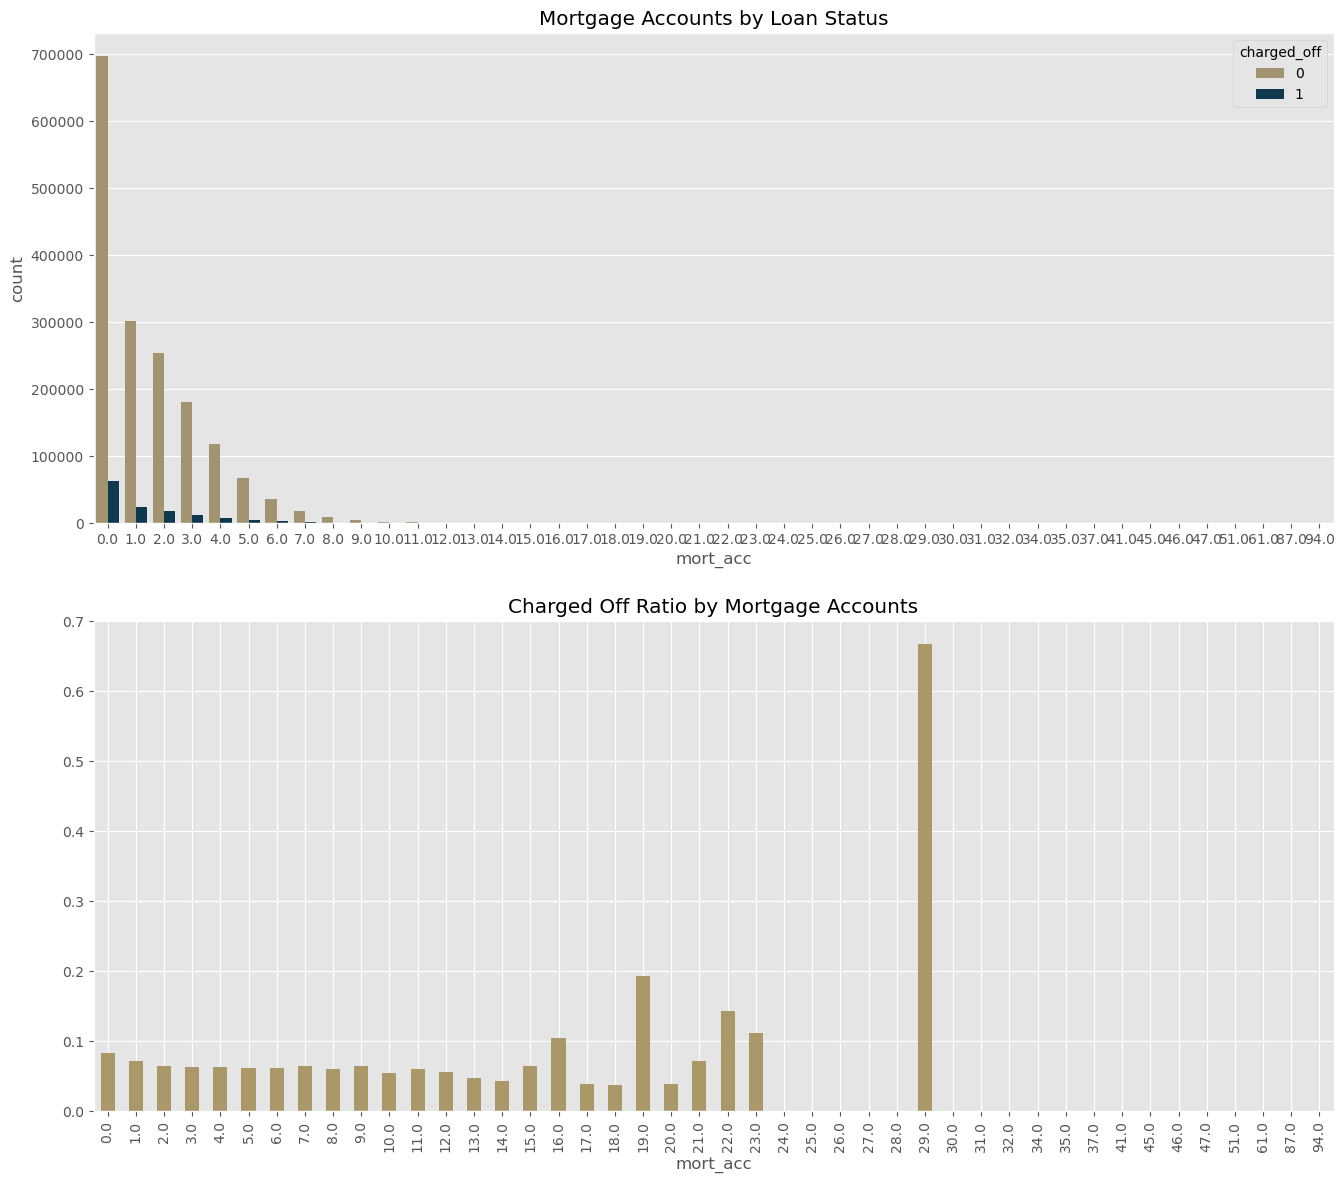

In [158]:
# mort_acc
plt.figure(figsize=(16,14))
plt.subplot(2,1,1)
sns.countplot(data=loan, x='mort_acc', hue='charged_off', palette=gwu)
plt.title('Mortgage Accounts by Loan Status')
plt.subplot(2,1,2)
cfratio(loan,'mort_acc').plot(kind='bar', color='#AA9868')
plt.title('Charged Off Ratio by Mortgage Accounts')

When mortgage accounts number less than 15, the number of mortgage account is almost inversely proportional to the charged off ratio. When the number more than 15, there is no obvious pattern.

In [159]:
# term
loan['term'].value_counts()

 36 months    1308593
 60 months     518532
Name: term, dtype: int64

In [160]:
loan['term'] = loan['term'].apply(lambda v:np.int8(v.split()[0]))
loan['term'].value_counts()

36    1308593
60     518532
Name: term, dtype: int64

Text(0.5, 1.0, 'Charged Off Ratio by Terms')

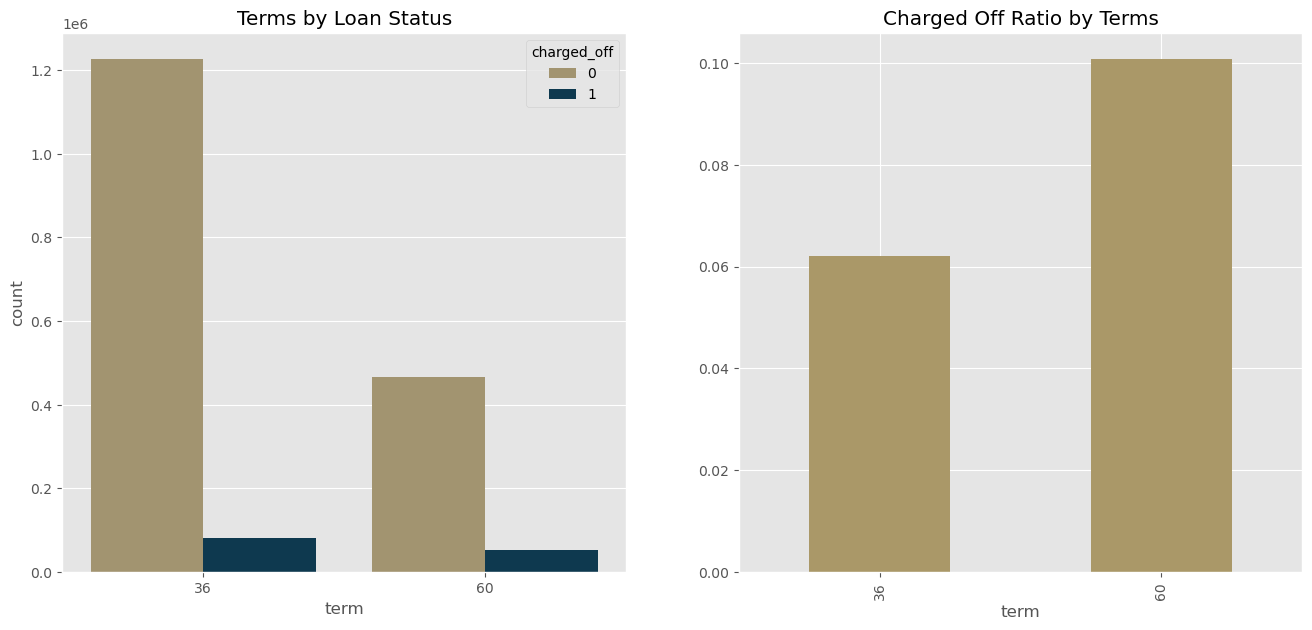

In [161]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.countplot(data=loan, x='term', hue='charged_off', palette=gwu)
plt.title('Terms by Loan Status')
plt.subplot(1,2,2)
cfratio(loan,'term').plot(kind='bar', color='#AA9868')
plt.title('Charged Off Ratio by Terms')

The loan with 36-month payment times has the higher counts of either fully Paid or charged Off, but the lower charged off percent. The loan with 60-month payment times has the higher charged off percent.

Text(0.5, 1.0, 'Interest Rate by Loan Status')

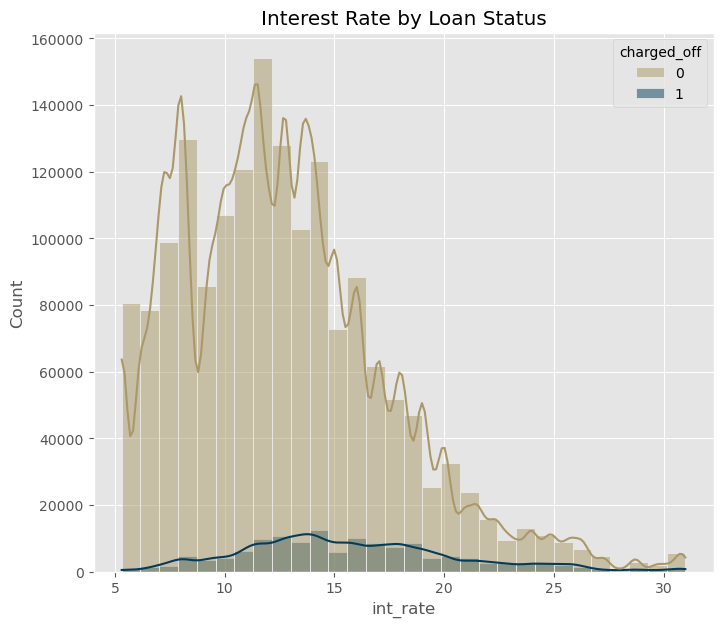

In [166]:
# int_rate
plt.figure(figsize=(8,7))
sns.histplot(data=loan, x='int_rate', hue='charged_off', bins=30, kde=True, palette=gwu)
plt.title('Interest Rate by Loan Status')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '(5.308999999999999, 8.39]'),
  Text(1, 0, '(8.39, 11.39]'),
  Text(2, 0, '(11.39, 13.58]'),
  Text(3, 0, '(13.58, 16.55]'),
  Text(4, 0, '(16.55, 30.99]')])

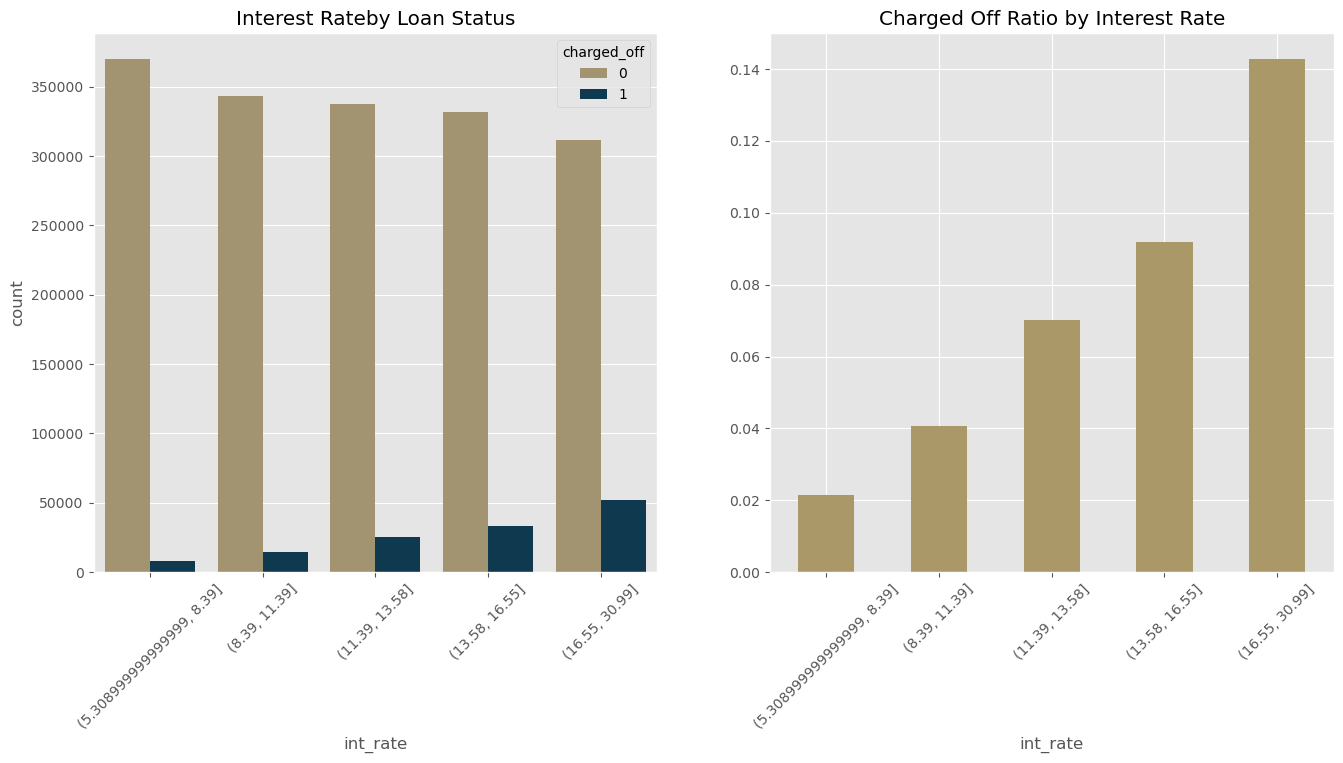

In [168]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.countplot(data=loan, x=group('int_rate',5), hue='charged_off', palette=gwu)
plt.xticks(rotation=45)
plt.title('Interest Rate by Loan Status')
plt.subplot(1,2,2)
cfratio(loan,group('int_rate',5)).plot(kind='bar', color='#AA9868')
plt.title('Charged Off Ratio by Interest Rate')
plt.xticks(rotation=45)

It seems that loans with high interest rate are more likely to be charged off.

In [169]:
# home_ownership
loan['home_ownership'].value_counts()

MORTGAGE    908212
RENT        711059
OWN         206992
ANY            858
NONE             4
Name: home_ownership, dtype: int64

Text(0.5, 1.0, 'Charged Off Ratio by Home Ownership')

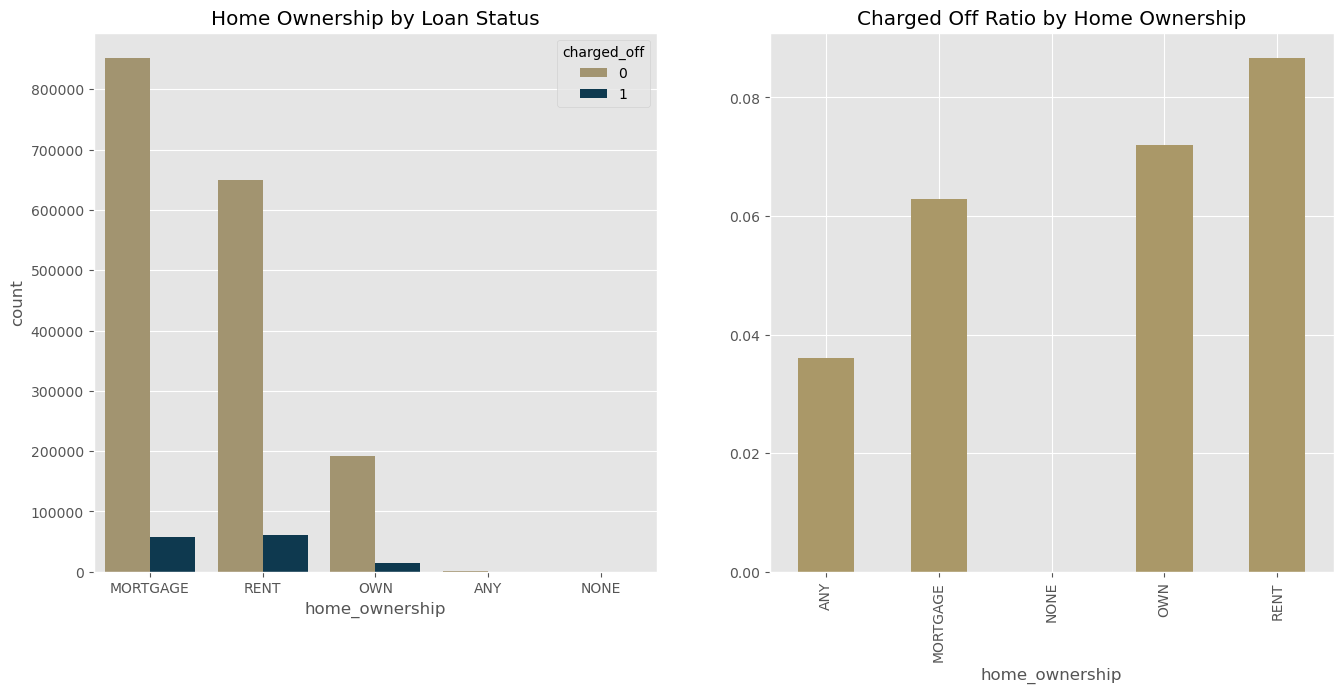

In [170]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.countplot(data=loan, x='home_ownership', hue='charged_off', palette=gwu)
plt.title('Home Ownership by Loan Status')
plt.subplot(1,2,2)
cfratio(loan,'home_ownership').plot(kind='bar', color='#AA9868')
plt.title('Charged Off Ratio by Home Ownership')

MORTGAGE has the highest value of fully paid and the lowest charged off ratio. RENT has the highest charged off ratio.

In [171]:
# annual_inc
loan['annual_inc'].describe()

count    1.827125e+06
mean     7.879205e+04
std      1.207525e+05
min      0.000000e+00
25%      4.700000e+04
50%      6.500000e+04
75%      9.500000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64

The annual income variable has a large range which ranges from 0 to 110 million. So I will take a log transform of the annual income to analysis this varaible.

In [172]:
loan['log_annual_inc'] = np.log(loan[loan['annual_inc']>0]['annual_inc'])

Text(0.5, 1.0, 'Annual Income Distribution by Loan Status')

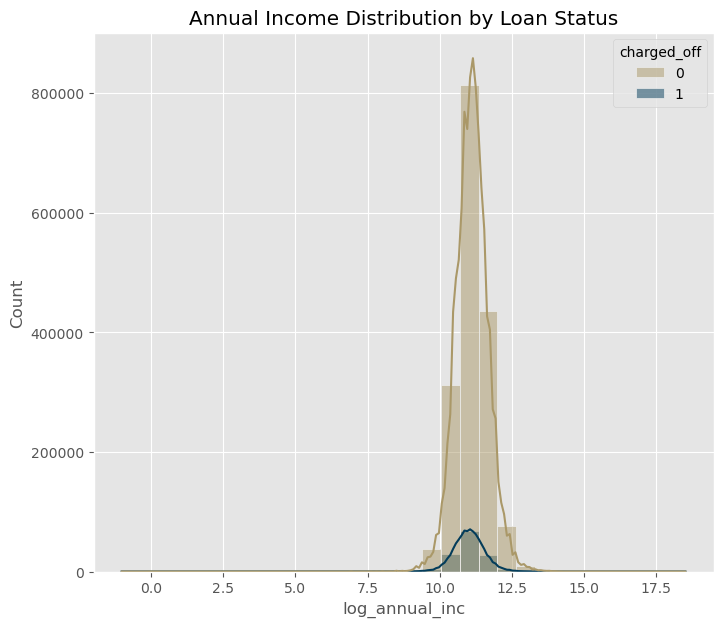

In [173]:
plt.figure(figsize=(8,7))
sns.histplot(data=loan, x='log_annual_inc', hue='charged_off', bins=30, kde=True, palette=gwu)
plt.title('Annual Income Distribution by Loan Status')

Text(0.5, 1.0, 'Charged Off Ratio by Annual Income')

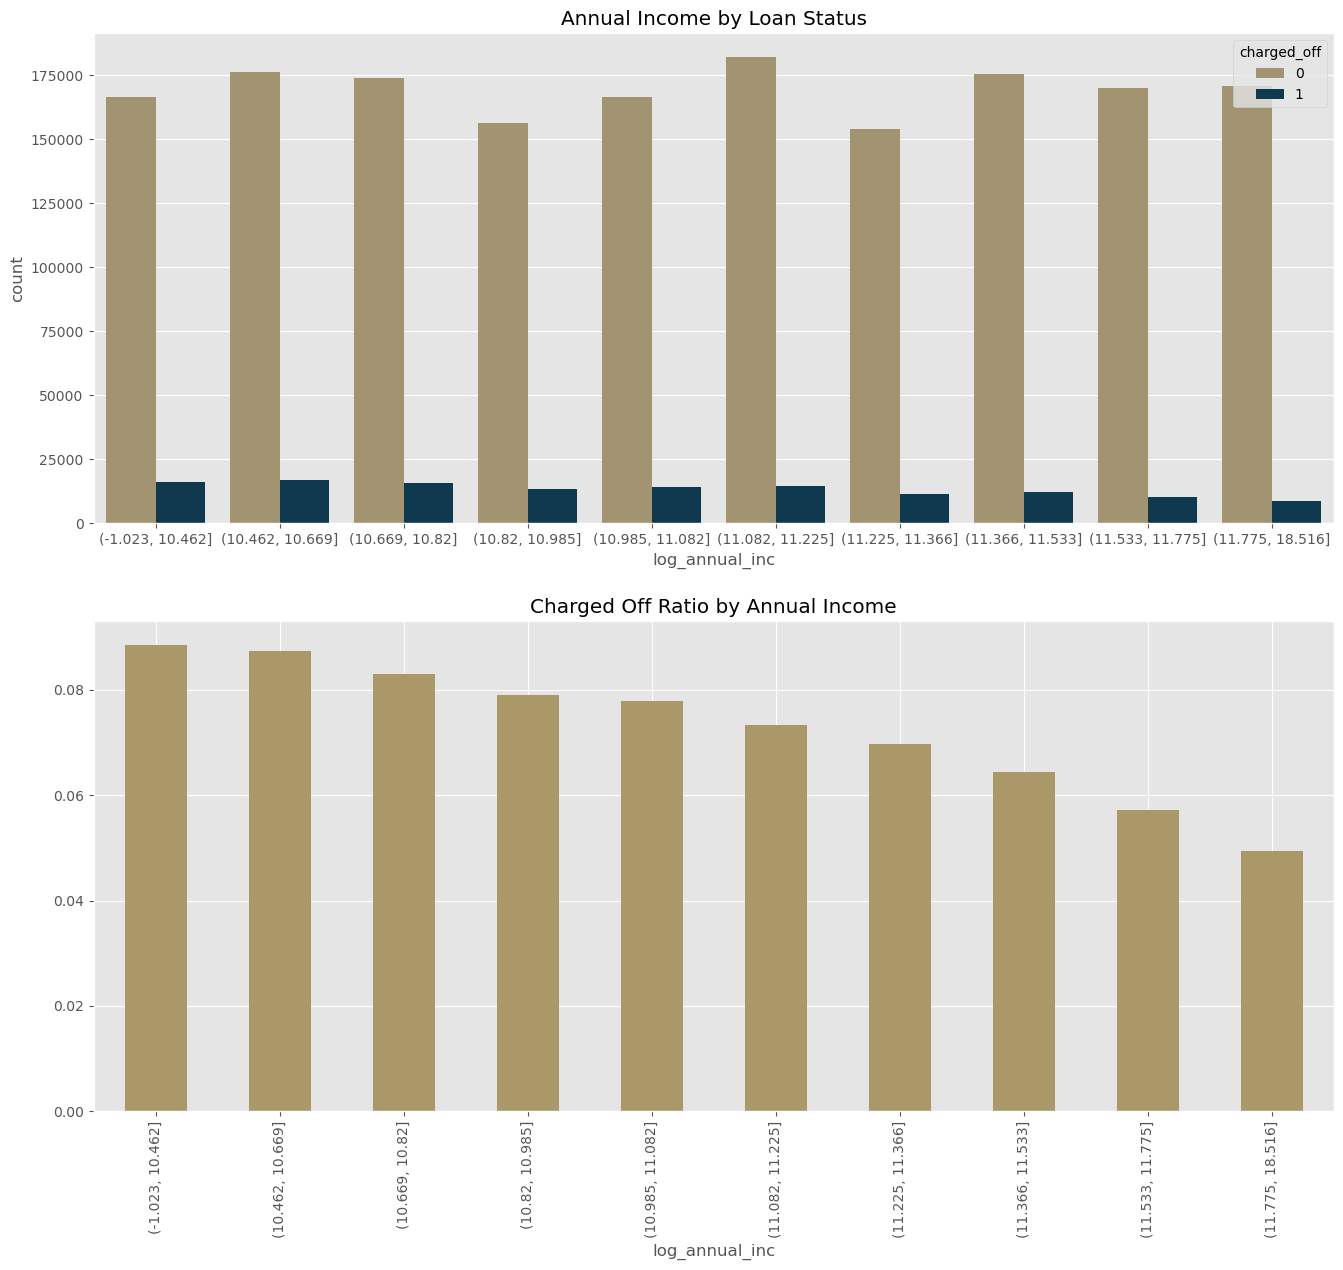

In [174]:
plt.figure(figsize=(16,14))
plt.subplot(2,1,1)
sns.countplot(data=loan, x=group('log_annual_inc',10), hue='charged_off', palette=gwu)
plt.title('Annual Income by Loan Status')
plt.subplot(2,1,2)
cfratio(loan,group('log_annual_inc',10)).plot(kind='bar', color='#AA9868')
plt.title('Charged Off Ratio by Annual Income')

The lower the income, the higher the charged off percent.

In [191]:
dropl.append('log_annual_inc')

In [177]:
# verification_status
loan['verification_status'].value_counts()

Source Verified    726653
Not Verified       608233
Verified           492239
Name: verification_status, dtype: int64

Text(0.5, 1.0, 'Charged Off Ratio by Verification Status')

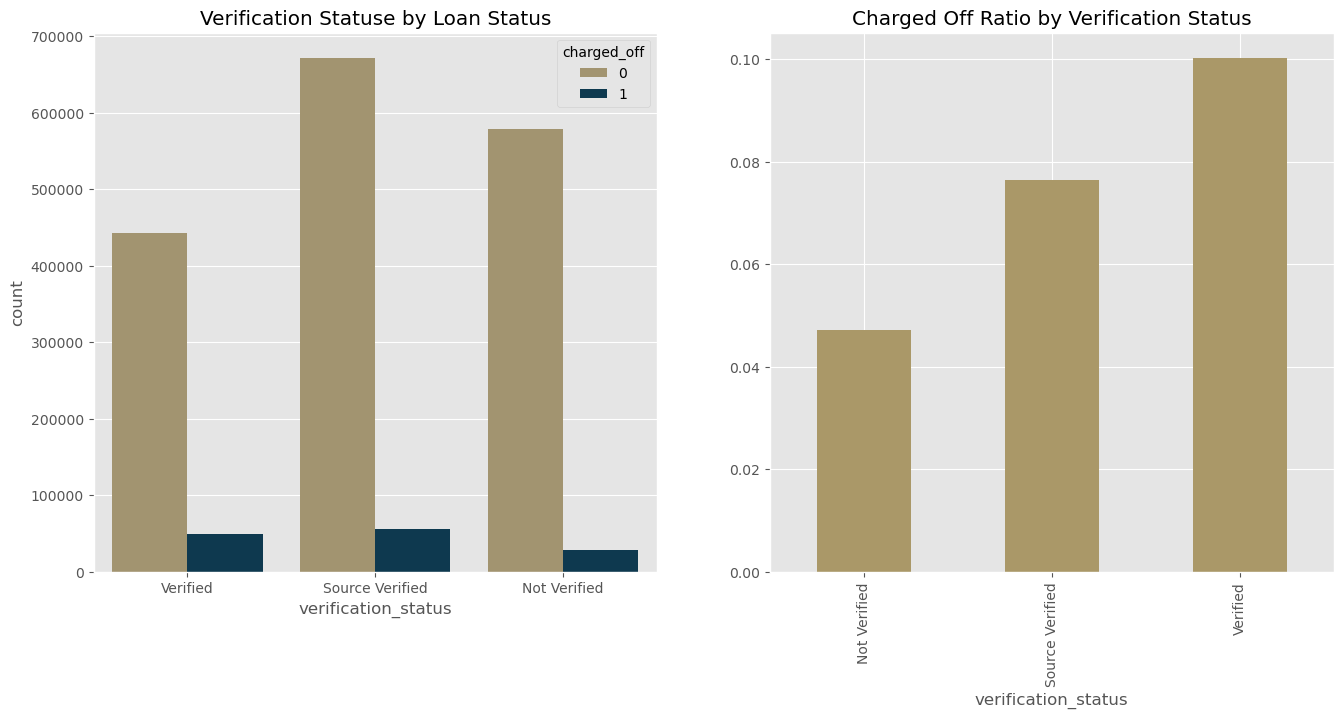

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.countplot(data=loan, x='verification_status', hue='charged_off', palette=gwu)
plt.title('Verification Statuse by Loan Status')
plt.subplot(1,2,2)
cfratio(loan,'verification_status').plot(kind='bar', color='#AA9868')
plt.title('Charged Off Ratio by Verification Status')


People whose annual income been verified have the highest default rates.

Text(0.5, 1.0, 'dti by Loan Status')

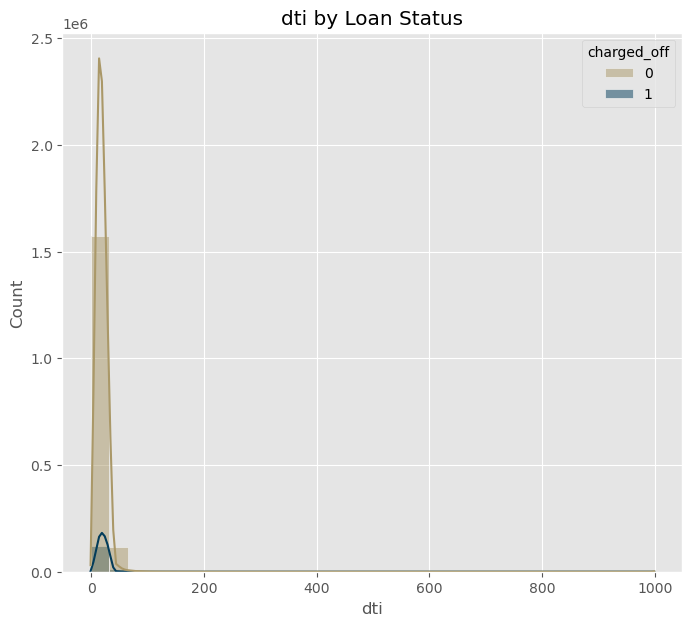

In [179]:
# dti
plt.figure(figsize=(8,7))
sns.histplot(data=loan, x='dti', hue='charged_off', bins=30, kde=True, palette=gwu)
plt.title('dti by Loan Status')

Text(0.5, 1.0, 'Charged Off Ratio by dti')

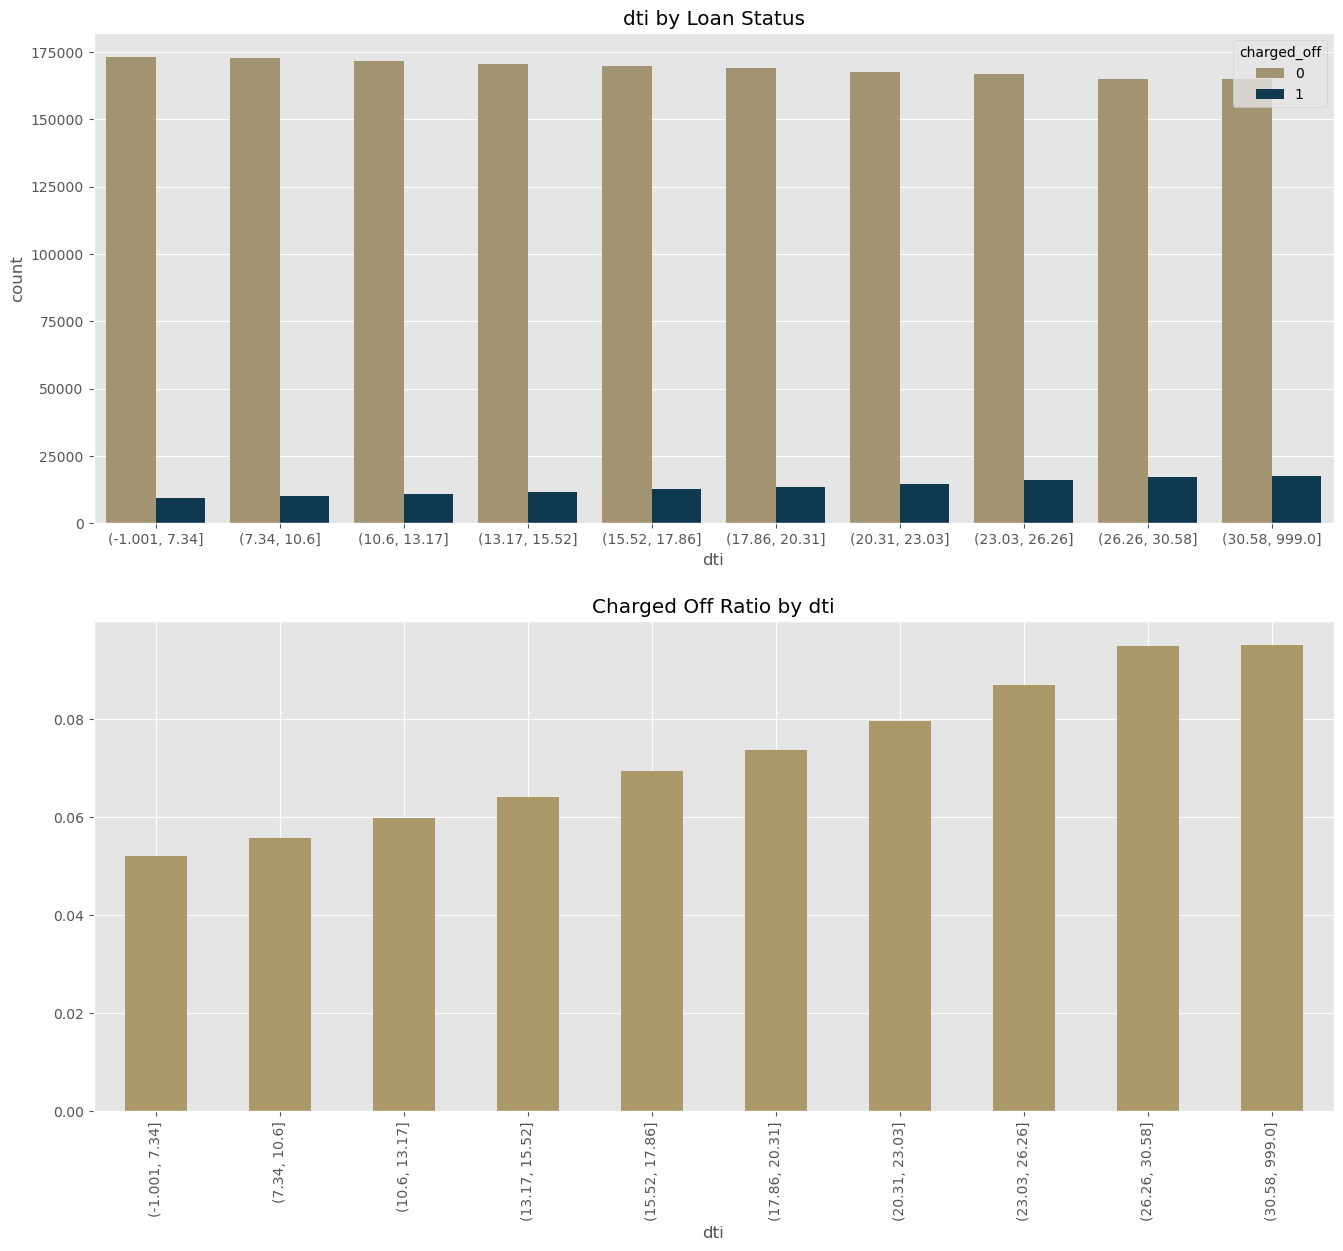

In [180]:
plt.figure(figsize=(16,14))
plt.subplot(2,1,1)
sns.countplot(data=loan, x=group('dti',10), hue='charged_off', palette=gwu)
plt.title('dti by Loan Status')
plt.subplot(2,1,2)
cfratio(loan,group('dti',10)).plot(kind='bar', color='#AA9868')
plt.title('Charged Off Ratio by dti')

The value of dti is mainly in the range of 0 to 40. We can clearly see that as the dti grows, so does the charged off percent.

In [182]:
# earliest_cr_line
## grab the year
loan['earliest_cr_line'] = pd.DatetimeIndex(loan['earliest_cr_line']).year
loan['earliest_cr_line'].value_counts()

2004    117455
2003    116286
2005    112946
2002    109644
2001    108757
2006    102371
2000    102276
1999     92782
2007     79537
1998     77426
1997     67436
1996     65894
1995     61668
1994     55096
2008     52134
1993     45665
2009     33609
1990     32262
1992     32189
2010     32114
2011     31987
1991     30345
1989     29775
2012     25371
1988     24767
1987     22907
1986     19710
2013     19091
1985     17087
1984     15830
2014     13226
1983     12838
1982      9995
1981      7328
1979      6206
1978      5945
1980      5768
1977      5191
2015      4231
1976      3992
1975      3011
1974      2637
1973      2433
1972      2054
1971      1381
1970      1353
1969      1213
1968       893
1967       783
1966       553
1965       487
1964       353
1963       211
1962       148
1960       111
1961       110
1959        90
1958        43
1956        26
1957        22
1950        17
1955        15
1951        13
1953         8
1954         6
1952         5
1946      

In [183]:
## for easy understanding, I will convert the year into 'age' of the earliest reported credit line
loan['earliest_cr_line_y'] = 2023-loan['earliest_cr_line']

In [192]:
dropl.append('earliest_cr_line')

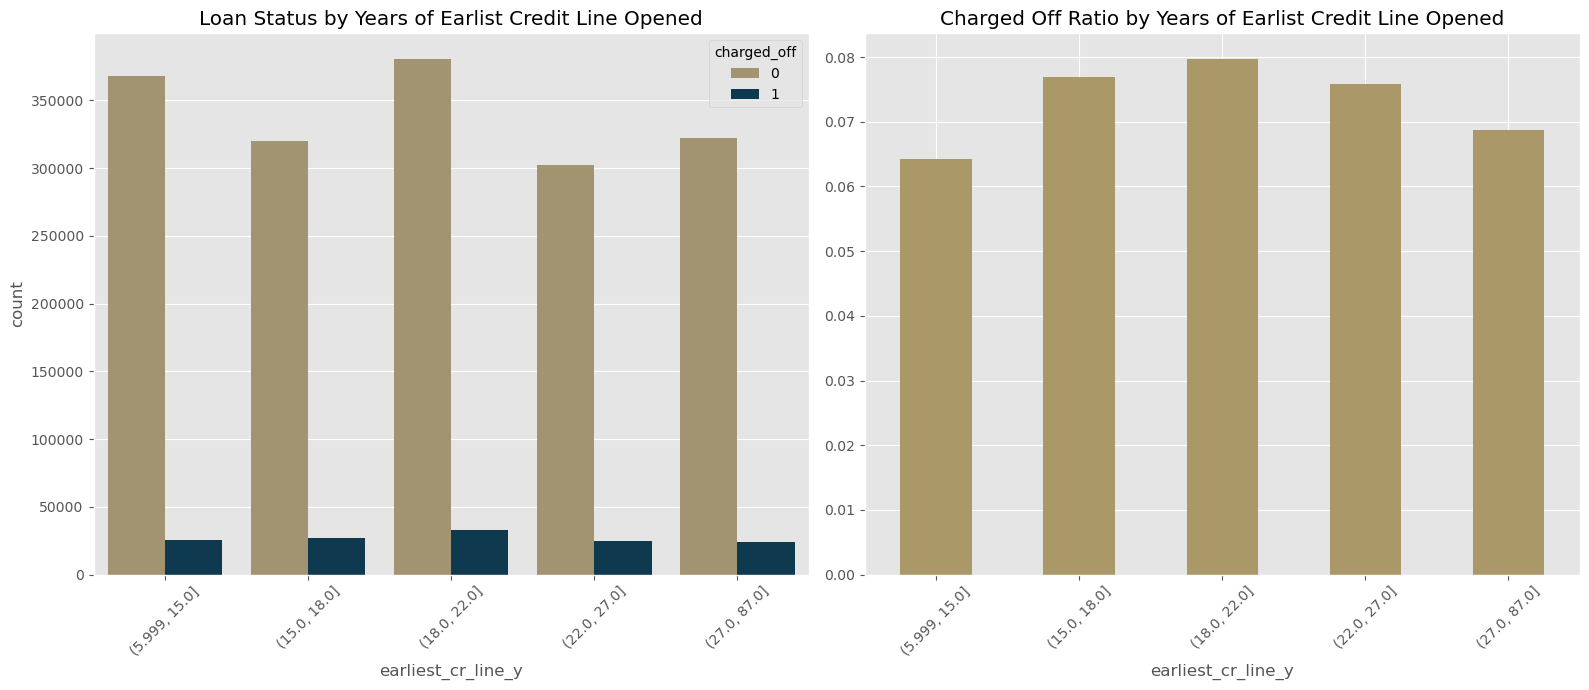

In [185]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.countplot(x=group('earliest_cr_line_y',5), data=loan, hue='charged_off', palette=gwu)
plt.xticks(rotation=45)
plt.title('Loan Status by Years of Earlist Credit Line Opened')
plt.subplot(1,2,2)
cfratio(loan,group('earliest_cr_line_y',5)).plot(kind='bar',color='#AA9868')
plt.xticks(rotation=45)
plt.title('Charged Off Ratio by Years of Earlist Credit Line Opened')
plt.tight_layout()

Borrowers with short lines of credits seems to have low charged off rate.

In [195]:
# revol_bal
loan['revol_bal'].describe()

count    1.827125e+06
mean     1.681562e+04
std      2.312118e+04
min      0.000000e+00
25%      5.986000e+03
50%      1.137600e+04
75%      2.040300e+04
max      2.904836e+06
Name: revol_bal, dtype: float64

The revol_bal variable has a large range which ranges from 0 to 2 million. So I will take a log transform to this variable.

In [196]:
loan['log_revol_bal'] = np.log(loan[loan['revol_bal']>0]['revol_bal'])

Text(0.5, 1.0, 'Loan Status by Credits Revolving Balance')

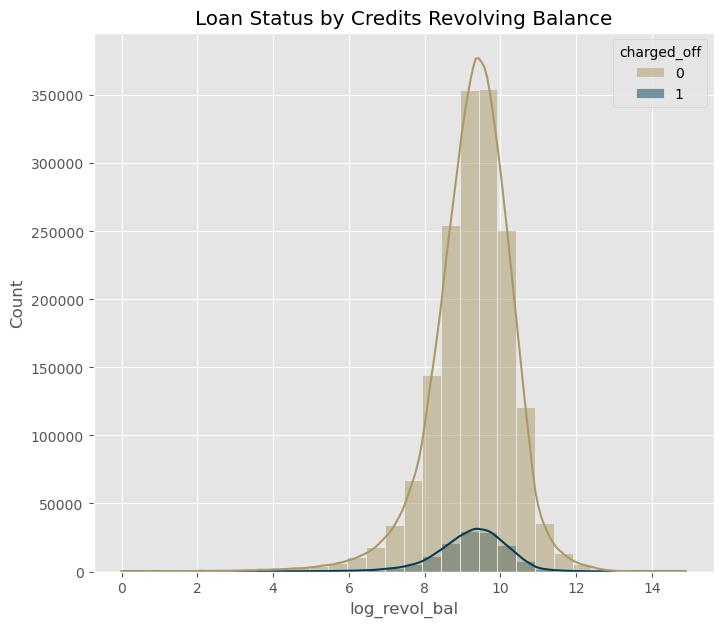

In [198]:
plt.figure(figsize=(8,7))
sns.histplot(data=loan, x='log_revol_bal', hue='charged_off', bins=30, kde=True, palette=gwu)
plt.title('Loan Status by Credits Revolving Balance')

Text(0.5, 1.0, 'Charged Off Ratio by Credits Revolving Balance')

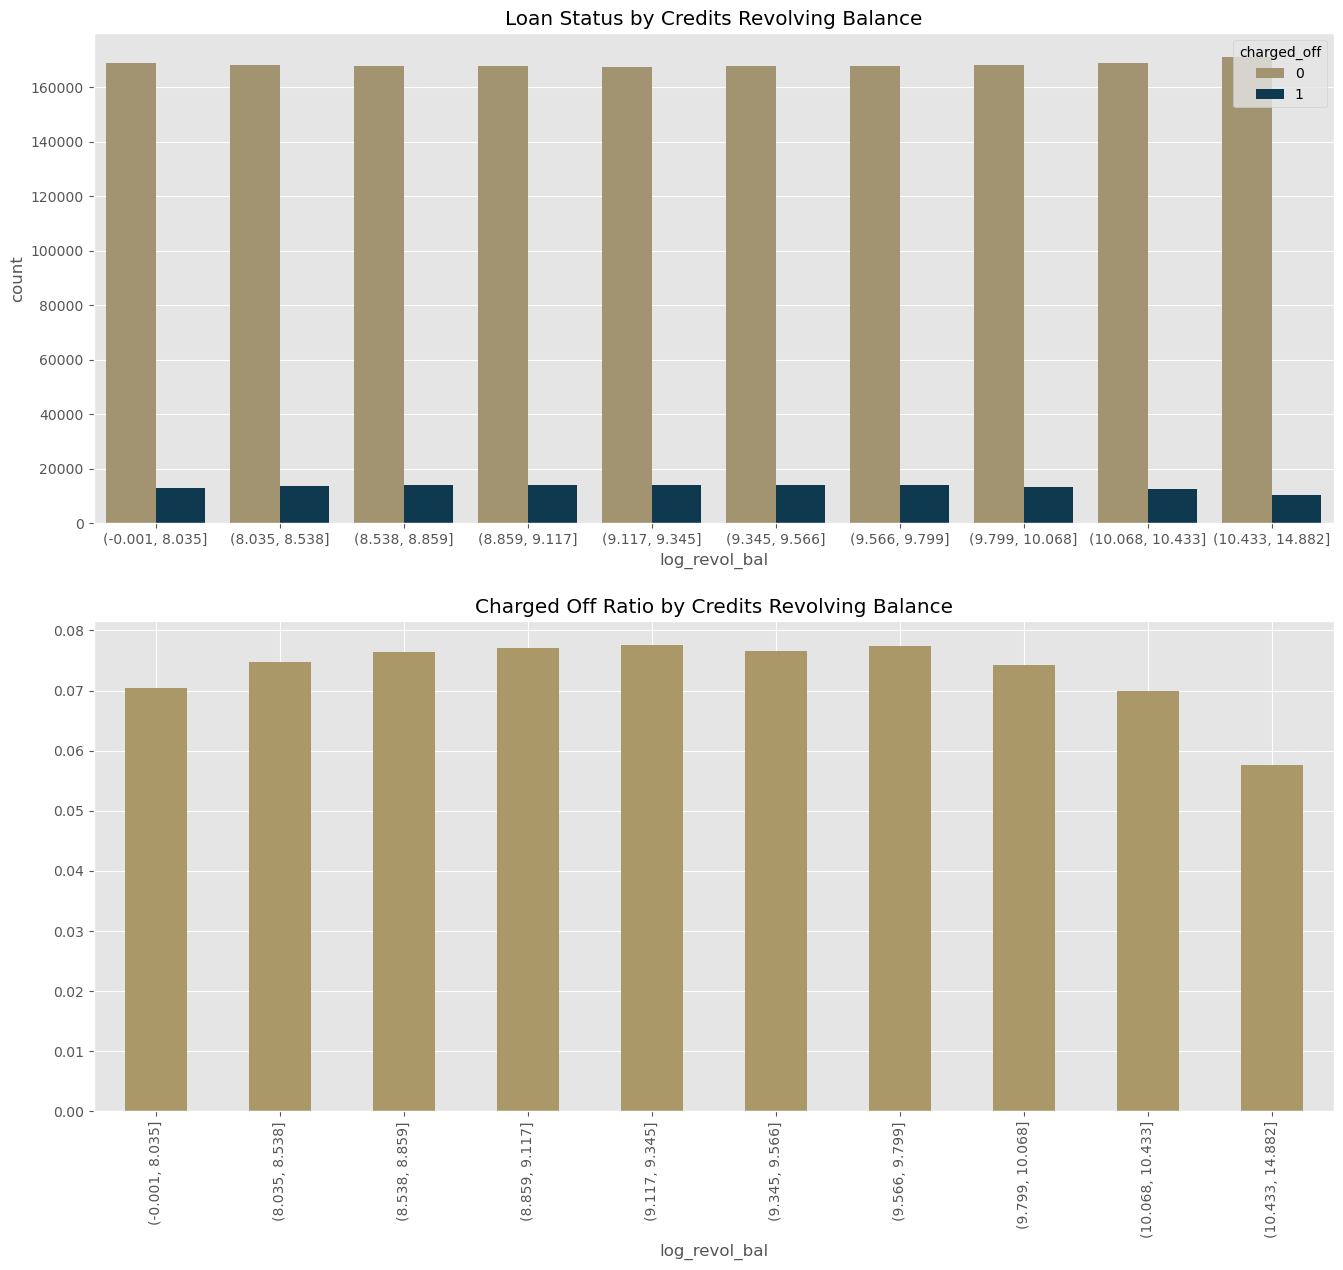

In [199]:
plt.figure(figsize=(16,14))
plt.subplot(2,1,1)
sns.countplot(data=loan, x=group('log_revol_bal',10), hue='charged_off', palette=gwu)
plt.title('Loan Status by Credits Revolving Balance')
plt.subplot(2,1,2)
cfratio(loan,group('log_revol_bal',10)).plot(kind='bar', color='#AA9868')
plt.title('Charged Off Ratio by Credits Revolving Balance')

As the revolving balance increase, the charged off ratio slightly decrease.

In [200]:
dropl.append('log_revol_bal')

Text(0.5, 1.0, 'Loan Status by Revolving Line Utilization Rate')

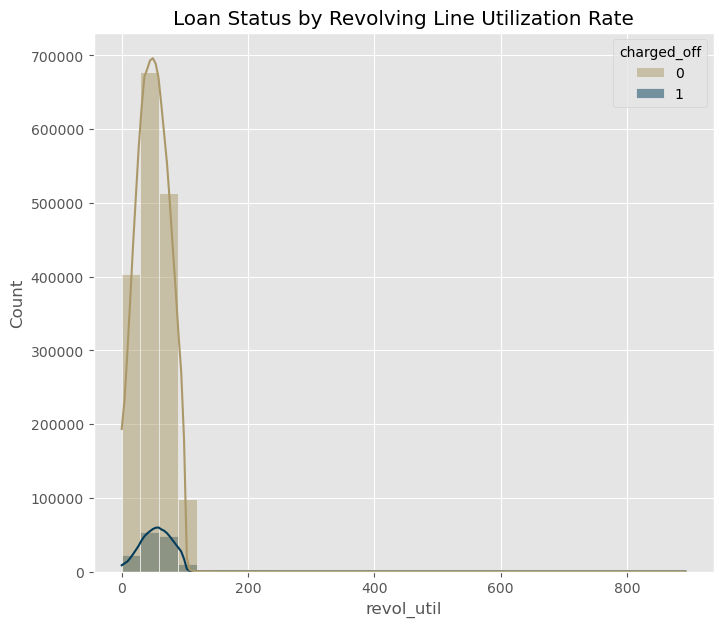

In [205]:
# revol_util
plt.figure(figsize=(8,7))
sns.histplot(data=loan, x='revol_util', hue='charged_off', bins=30, kde=True, palette=gwu)
plt.title('Loan Status by Revolving Line Utilization Rate')

Text(0.5, 1.0, 'Charged Off Ratio by Revolving Line Utilization Rate')

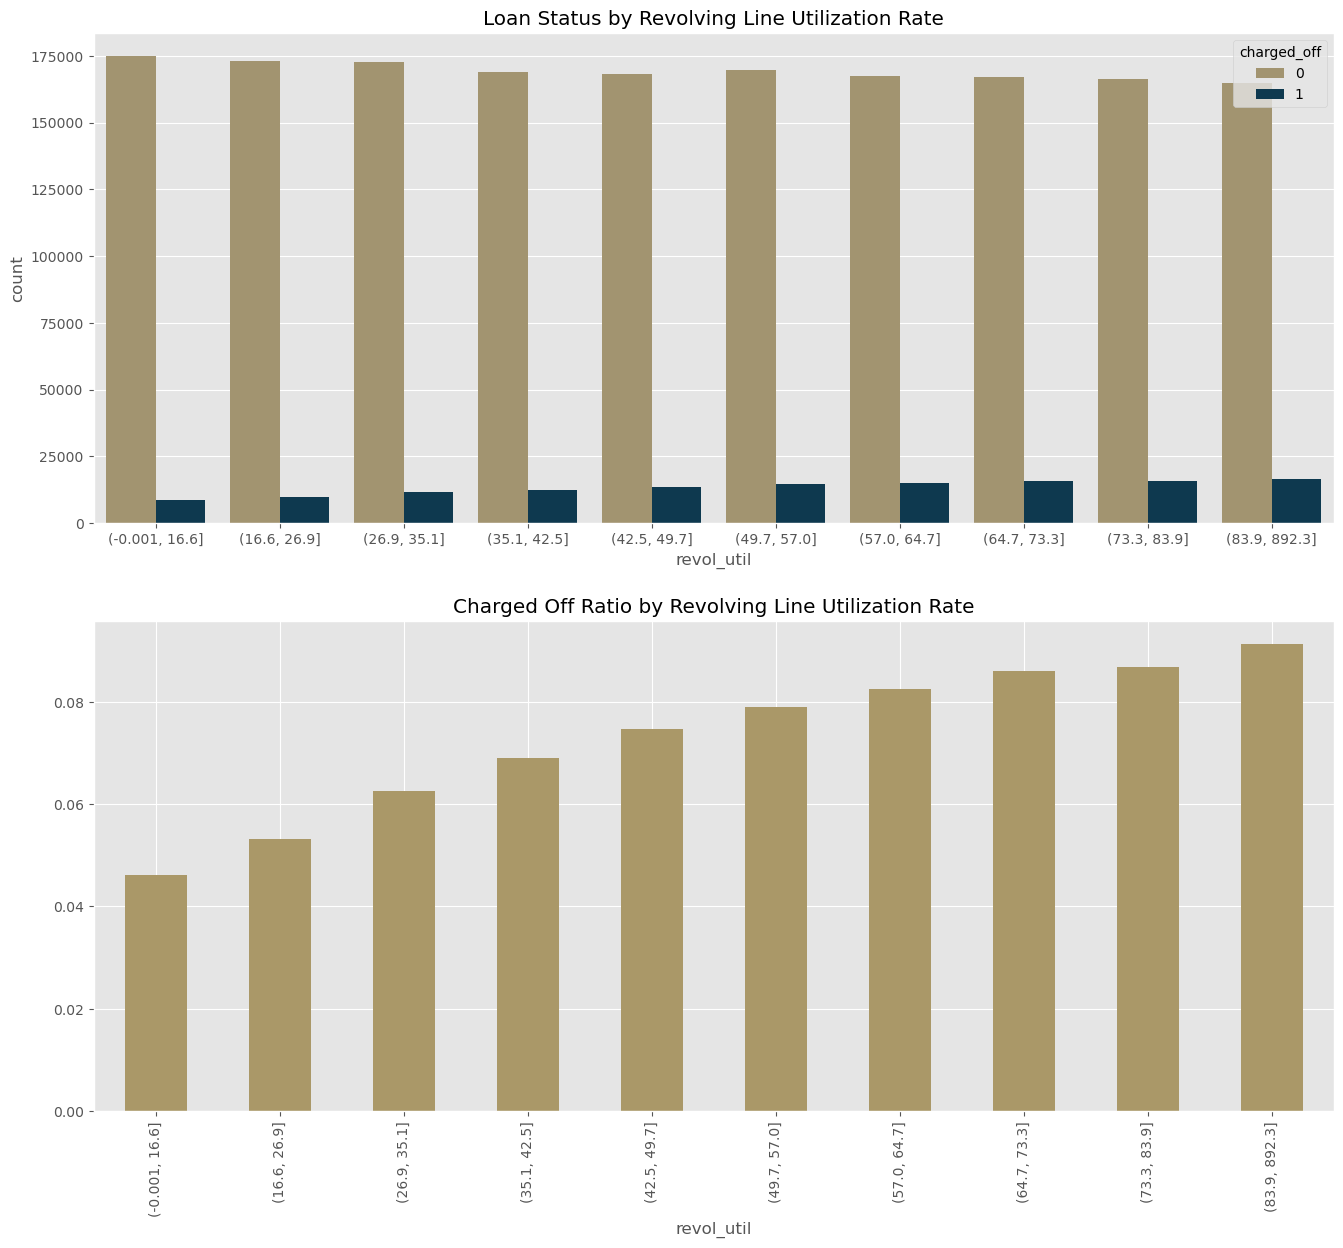

In [206]:
plt.figure(figsize=(16,14))
plt.subplot(2,1,1)
sns.countplot(data=loan, x=group('revol_util',10), hue='charged_off', palette=gwu)
plt.title('Loan Status by Revolving Line Utilization Rate')
plt.subplot(2,1,2)
cfratio(loan,group('revol_util',10)).plot(kind='bar', color='#AA9868')
plt.title('Charged Off Ratio by Revolving Line Utilization Rate')

As the revolving line utilization rate grows, the charged off percent increase.

In [207]:
# initial_list_status (W-Whole;F-Fraction)
loan['initial_list_status'].value_counts()

w    1298485
f     528640
Name: initial_list_status, dtype: int64

(array([0, 1]), [Text(0, 0, 'f'), Text(1, 0, 'w')])

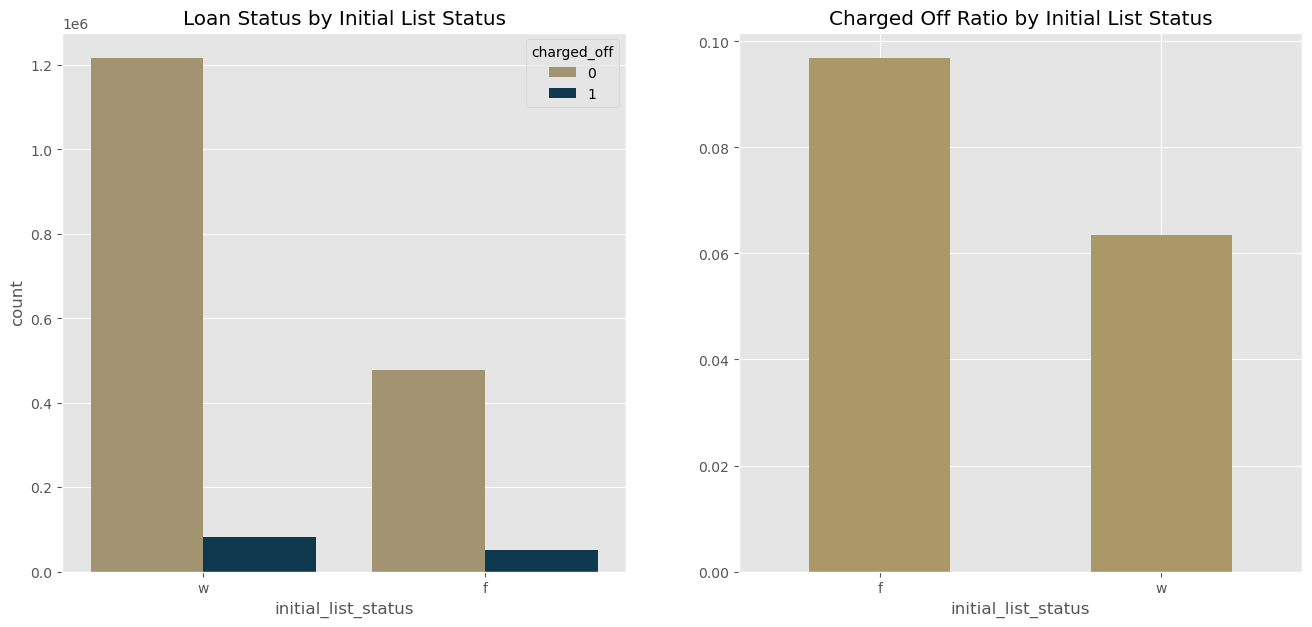

In [218]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.countplot(data=loan, x='initial_list_status', hue='charged_off', palette=gwu)
plt.title('Loan Status by Initial List Status')
plt.subplot(1,2,2)
cfratio(loan,'initial_list_status').plot(kind='bar', color='#AA9868')
plt.title('Charged Off Ratio by Initial List Status')
plt.xticks(rotation=0)

Whole loan has higher number of loans also higher charged off ratio.

In [219]:
# application_type
loan['application_type'].value_counts()

Individual    1724431
Joint App      102694
Name: application_type, dtype: int64

(array([0, 1]), [Text(0, 0, 'Individual'), Text(1, 0, 'Joint App')])

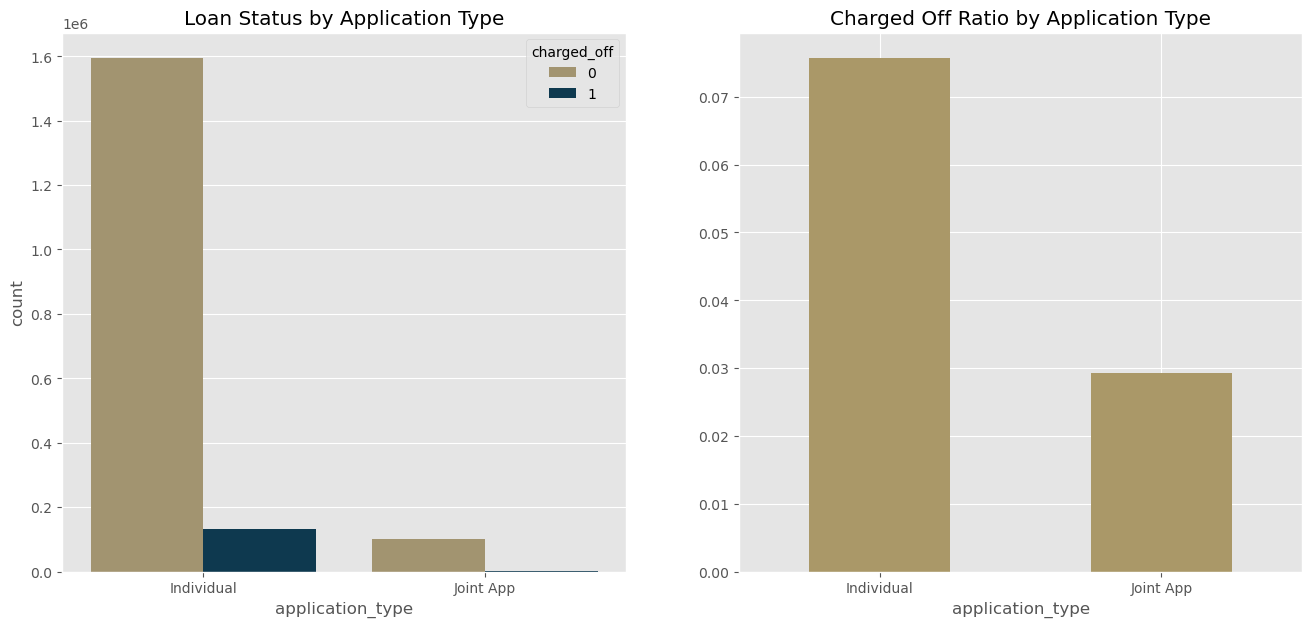

In [221]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.countplot(data=loan, x='application_type', hue='charged_off', palette=gwu)
plt.title('Loan Status by Application Type')
plt.subplot(1,2,2)
cfratio(loan,'application_type').plot(kind='bar', color='#AA9868')
plt.title('Charged Off Ratio by Application Type')
plt.xticks(rotation=0)

The number of individual application is pretty higher than joint application, as well as default rate.

In [225]:
# addr_state
## calculate charge off rate by state
by_state = loan.groupby(['addr_state','charged_off'])['charged_off'].agg(counts='count').reset_index()
by_state_pivot = by_state.pivot_table(values='counts',index='addr_state',columns='charged_off').reset_index()
by_state_pivot.head()

charged_off,addr_state,0,1
0,AK,3887.0,345.0
1,AL,19784.0,1960.0
2,AR,12517.0,1242.0
3,AZ,40458.0,3159.0
4,CA,232354.0,19023.0


In [256]:
by_state_pivot['charged_off_percentage'] = round(by_state_pivot[1]/(by_state_pivot[1]+by_state_pivot[0])*100,2)

In [260]:
by_state_pivot.sort_values('charged_off_percentage')

charged_off,addr_state,0,1,charged_off_percentage
21,ME,4163.0,142.0,3.30
13,ID,3576.0,167.0,4.46
46,VT,3926.0,185.0,4.50
37,OR,20833.0,1117.0,5.09
30,NH,8710.0,472.0,5.14
49,WV,6476.0,381.0,5.56
7,DC,3989.0,239.0,5.65
5,CO,37397.0,2247.0,5.67
40,SC,21646.0,1304.0,5.68
6,CT,27371.0,1662.0,5.72


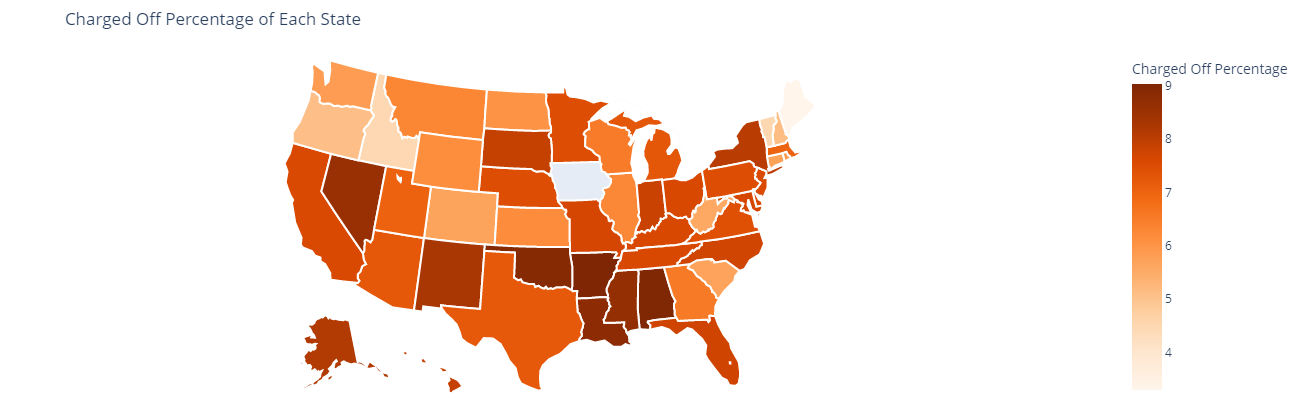

<Figure size 1600x700 with 0 Axes>

In [257]:
plt.figure(figsize=(16,7))
data = dict(type = 'choropleth',
            locations = by_state_pivot['addr_state'],
            locationmode = 'USA-states',
            z = by_state_pivot['charged_off_percentage'],
            text = by_state_pivot[1],
            marker = dict(line=dict(color='rgb(255,255,255)', width = 2)),
            colorscale = 'Oranges',
            colorbar = {'title':'Charged Off Percentage'},
            )
layout = dict(title = 'Charged Off Percentage of Each State',
              geo = dict(scope='usa')
              )
x = go.Figure(data = [data], layout = layout)
x.update_layout(autosize=False,
                margin = dict(l=0,r=0,b=0,t=50,pad=0,autoexpand=True),
                width=800,
                height=400)
po.iplot(x)

Maine has the lowest charged off ratio which is about 3.3%, and Arkansas has the highest ratio which is about 9.3%.

# 3. Data Engineering

## 3.1 Remove features in the drop list

In [268]:
print('We need to drop {} variables. They are:\n{}'.format(len(dropl),dropl))

We need to drop 11 variables. They are:
['issue_d', 'installment', 'total_acc', 'pub_rec_bankruptcies', 'grade', 'emp_title', 'emp_length', 'title', 'log_annual_inc', 'earliest_cr_line', 'log_revol_bal']


In [269]:
loan.drop(columns=dropl, inplace=True)

## 3.2 Dealing with missing values

In [270]:
missing = round(loan.isnull().mean().sort_values(ascending=False), 4)
missing

dti                    0.0008
revol_util             0.0008
loan_amnt              0.0000
pub_rec                0.0000
issue_y                0.0000
charged_off            0.0000
mort_acc               0.0000
application_type       0.0000
initial_list_status    0.0000
revol_bal              0.0000
open_acc               0.0000
term                   0.0000
addr_state             0.0000
purpose                0.0000
verification_status    0.0000
annual_inc             0.0000
home_ownership         0.0000
sub_grade              0.0000
int_rate               0.0000
earliest_cr_line_y     0.0000
dtype: float64

There are two features have missing value: 'dti' and 'revol_util', and the missing rate is quite low. I will just simply drop the rows with missing value.

In [271]:
loan.dropna(inplace=True)

<AxesSubplot:>

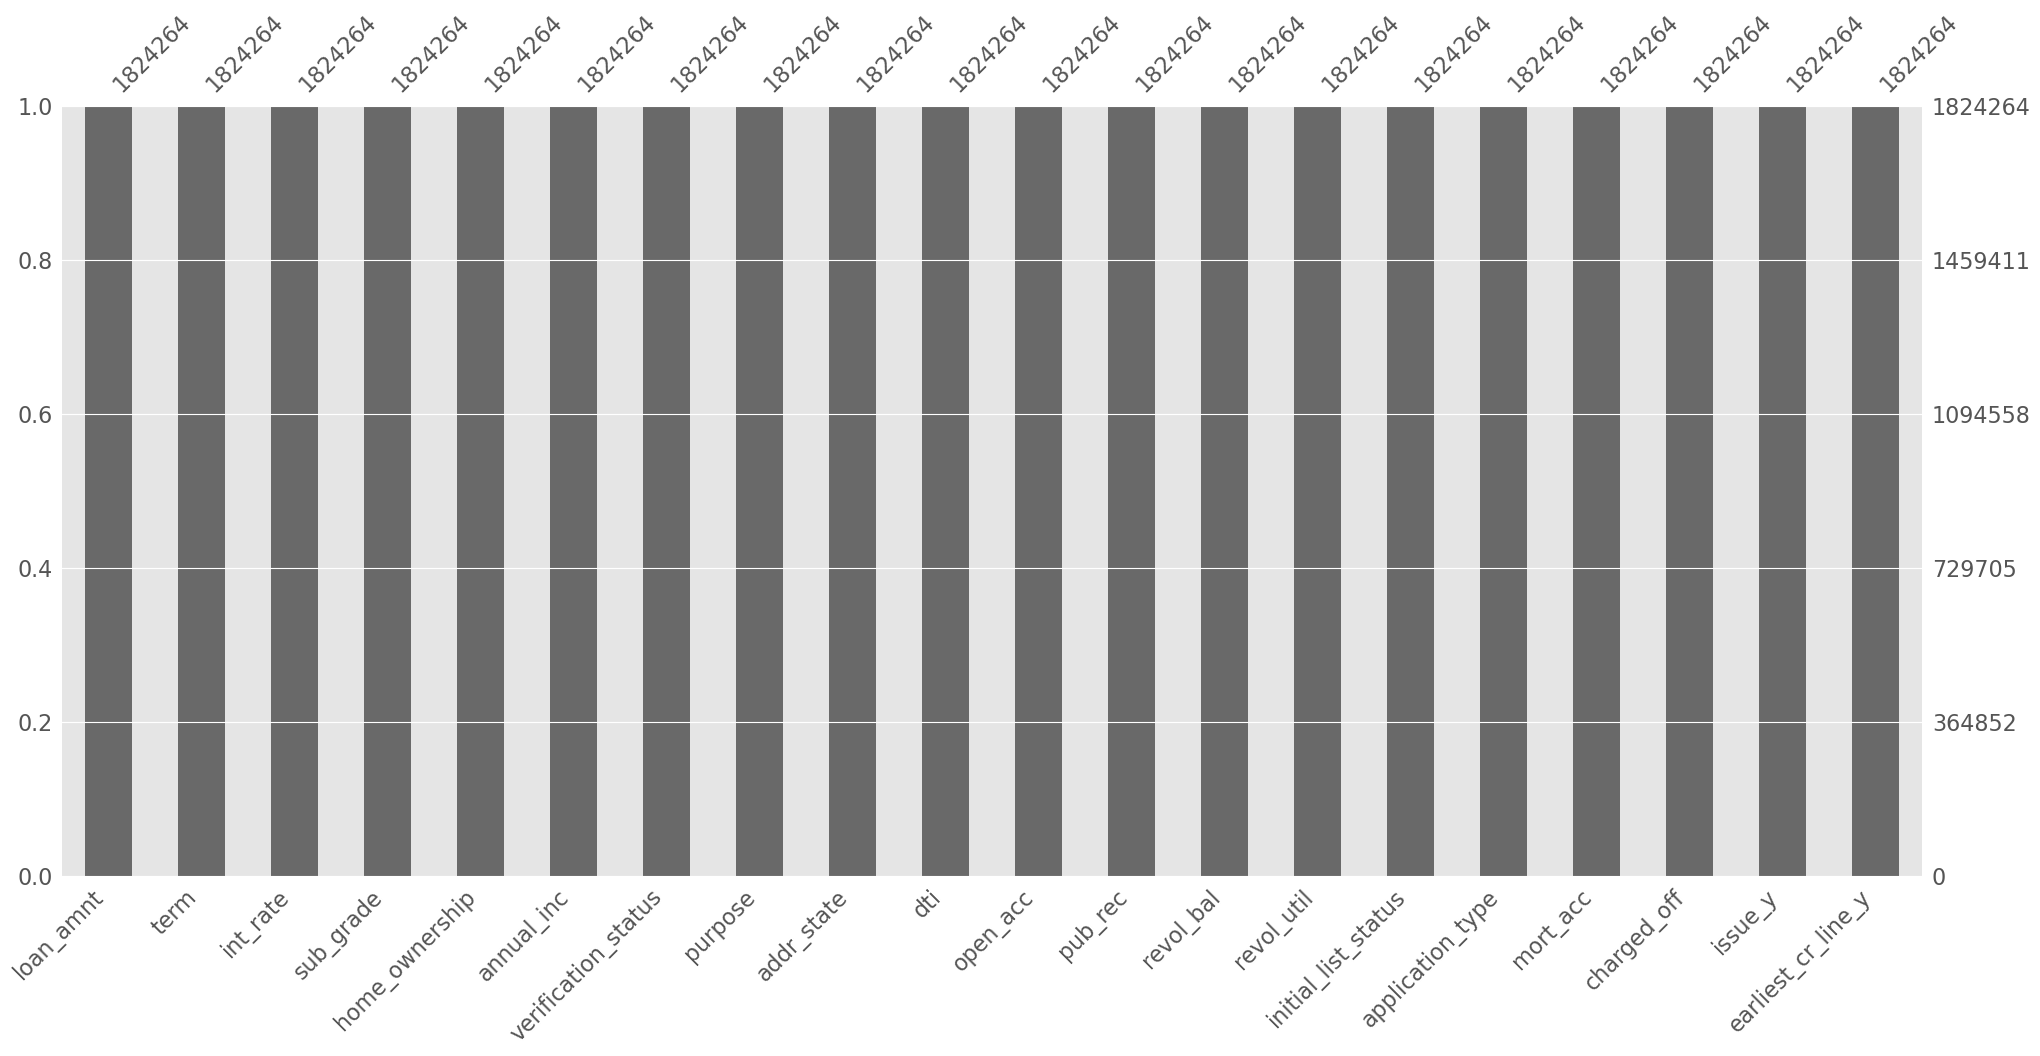

In [ ]:
# show the number of data in each column
msno.bar(loan)

We got 1,824,264 records.

## 3.3 Remove Outliers for Continuous Features

According to EDA, I choose to remove the outliers for some of the continuous features ('annual_inc','dti','revol_bal', 'revol_util'), which has large range of data.

In [55]:
def remove_outlier(df,col):
    '''
    This function is to keep data that are within +3 to -3 standard deviations in a column.
    Input:
    df: dataframe
    col: a column in data
    Output:
    A dataframe after removing outliers.
    '''
    mean = df[col].mean()
    std = df[col].std()
    return df[np.abs(df[col]-mean) <= (3*std)]

In [54]:
removel = ['annual_inc','dti','revol_bal','revol_util']

In [60]:
for col in removel:
    loan = remove_outlier(loan,col)
    print(f'After remove outliers from {col}, we have {loan.shape[0]} rows left.')

After remove outliers from annual_inc, we have 1819604 rows left.
After remove outliers from dti, we have 1813216 rows left.
After remove outliers from revol_bal, we have 1788040 rows left.
After remove outliers from revol_util, we have 1787930 rows left.


In [63]:
loan.shape

(1787930, 20)

In [61]:
# save final dataframe
loan.to_csv('outlier_removed.csv',index=False)

In [ ]:
loan = pd.read_csv('outlier_removed.csv')
display(loan.shape)
loan.columns.values

(1787930, 20)

array(['loan_amnt', 'term', 'int_rate', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'addr_state',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'initial_list_status', 'application_type', 'mort_acc',
       'charged_off', 'issue_y', 'earliest_cr_line_y'], dtype=object)